In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy.stats import norm
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('../DataSets/HR data.xlsx')
df

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Yes,Non-Travel,25 - 34,Ex-Employees,R&D,Technical Degree,STAFF-1905,1905,Male,Research Scientist,...,4,2,80,1,5,3,5,2,3,0
1466,Yes,Travel_Frequently,25 - 34,Ex-Employees,R&D,Life Sciences,STAFF-1868,1868,Male,Research Scientist,...,4,2,80,0,1,2,1,0,1,0
1467,Yes,Travel_Frequently,35 - 44,Ex-Employees,Sales,Other,STAFF-1667,1667,Male,Sales Executive,...,4,1,80,0,13,4,11,9,6,7
1468,Yes,Travel_Rarely,Under 25,Ex-Employees,R&D,Life Sciences,STAFF-1878,1878,Male,Research Scientist,...,4,1,80,0,1,3,1,0,0,0


In [3]:
df.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


In [4]:
df.columns = df.columns.str.upper().str.replace(" ", "_")
df

,ATTRITION,BUSINESS_TRAVEL,CF_AGE_BAND,CF_ATTRITION_LABEL,DEPARTMENT,EDUCATION_FIELD,EMP_NO,EMPLOYEE_NUMBER,GENDER,JOB_ROLE,...,PERFORMANCE_RATING,RELATIONSHIP_SATISFACTION,STANDARD_HOURS,STOCK_OPTION_LEVEL,TOTAL_WORKING_YEARS,WORK_LIFE_BALANCE,YEARS_AT_COMPANY,YEARS_IN_CURRENT_ROLE,YEARS_SINCE_LAST_PROMOTION,YEARS_WITH_CURR_MANAGER
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Yes,Non-Travel,25 - 34,Ex-Employees,R&D,Technical Degree,STAFF-1905,1905,Male,Research Scientist,...,4,2,80,1,5,3,5,2,3,0
1466,Yes,Travel_Frequently,25 - 34,Ex-Employees,R&D,Life Sciences,STAFF-1868,1868,Male,Research Scientist,...,4,2,80,0,1,2,1,0,1,0
1467,Yes,Travel_Frequently,35 - 44,Ex-Employees,Sales,Other,STAFF-1667,1667,Male,Sales Executive,...,4,1,80,0,13,4,11,9,6,7
1468,Yes,Travel_Rarely,Under 25,Ex-Employees,R&D,Life Sciences,STAFF-1878,1878,Male,Research Scientist,...,4,1,80,0,1,3,1,0,0,0


In [5]:
df.columns

Index([                 'ATTRITION',            'BUSINESS_TRAVEL',
                      'CF_AGE_BAND',         'CF_ATTRITION_LABEL',
                       'DEPARTMENT',            'EDUCATION_FIELD',
                           'EMP_NO',            'EMPLOYEE_NUMBER',
                           'GENDER',                   'JOB_ROLE',
                   'MARITAL_STATUS',                  'OVER_TIME',
                           'OVER18',   'TRAINING_TIMES_LAST_YEAR',
                                nan,                        '0.1',
                              'AGE',        'CF_CURRENT_EMPLOYEE',
                       'DAILY_RATE',         'DISTANCE_FROM_HOME',
                        'EDUCATION',             'EMPLOYEE_COUNT',
         'ENVIRONMENT_SATISFACTION',                'HOURLY_RATE',
                  'JOB_INVOLVEMENT',                  'JOB_LEVEL',
                 'JOB_SATISFACTION',             'MONTHLY_INCOME',
                     'MONTHLY_RATE',       'NUM_COMPANIES_WORK

In [6]:
df.JOB_SATISFACTION.isnull().sum()

0

<Axes: >

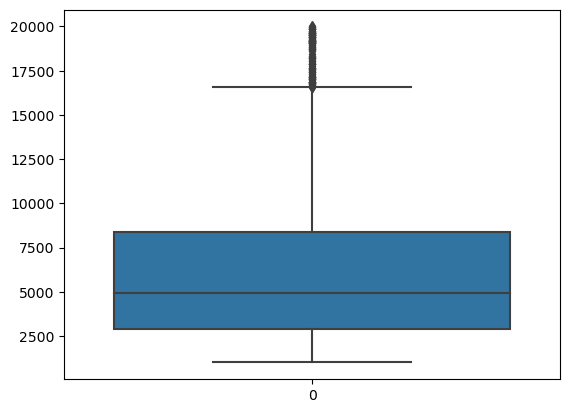

In [7]:
sb.boxplot(df.MONTHLY_INCOME)

In [8]:
i='MONTHLY_INCOME'
q3=np.percentile(df[i],75)
q1=np.percentile(df[i],25)
iqr=q3-q1
c1=q1-1.5*(iqr)
c2=q3+1.5*(iqr)


In [9]:
dt=df[(df[i]>c2)| (df[i]<c1)]
dt

,ATTRITION,BUSINESS_TRAVEL,CF_AGE_BAND,CF_ATTRITION_LABEL,DEPARTMENT,EDUCATION_FIELD,EMP_NO,EMPLOYEE_NUMBER,GENDER,JOB_ROLE,...,PERFORMANCE_RATING,RELATIONSHIP_SATISFACTION,STANDARD_HOURS,STOCK_OPTION_LEVEL,TOTAL_WORKING_YEARS,WORK_LIFE_BALANCE,YEARS_AT_COMPANY,YEARS_IN_CURRENT_ROLE,YEARS_SINCE_LAST_PROMOTION,YEARS_WITH_CURR_MANAGER
25,No,Travel_Rarely,45 - 54,Current Employees,R&D,Other,STAFF-32,32,Female,Manager,...,3,4,80,1,26,2,14,13,4,8
29,No,Travel_Rarely,45 - 54,Current Employees,Sales,Marketing,STAFF-38,38,Female,Manager,...,3,4,80,0,22,2,2,2,2,1
45,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Technical Degree,STAFF-58,58,Female,Research Director,...,3,4,80,0,23,3,22,15,15,8
62,No,Travel_Rarely,45 - 54,Current Employees,R&D,Medical,STAFF-80,80,Female,Research Director,...,3,4,80,1,29,2,27,3,13,8
105,No,Non-Travel,Over 55,Current Employees,HR,Human Resources,STAFF-140,140,Female,Manager,...,4,4,80,1,30,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,No,Travel_Rarely,45 - 54,Current Employees,R&D,Medical,STAFF-1665,1665,Female,Manager,...,4,3,80,1,36,3,10,8,4,7
1377,No,Travel_Rarely,35 - 44,Current Employees,R&D,Life Sciences,STAFF-1666,1666,Male,Research Director,...,4,1,80,1,14,3,14,10,6,11
1384,No,Travel_Rarely,35 - 44,Current Employees,R&D,Other,STAFF-1595,1595,Male,Manager,...,4,4,80,0,24,3,1,0,0,1
1385,No,Travel_Rarely,Over 55,Current Employees,Sales,Marketing,STAFF-1578,1578,Male,Manager,...,4,3,80,1,36,3,36,6,2,13


In [10]:
s=dt.index
s


Index([  25,   29,   45,   62,  105,  106,  112,  119,  123,  147,
       ...
       1271, 1293, 1313, 1315, 1334, 1349, 1377, 1384, 1385, 1391],
      dtype='int64', length=114)

In [11]:
df=df.drop(labels=s)


<Axes: >

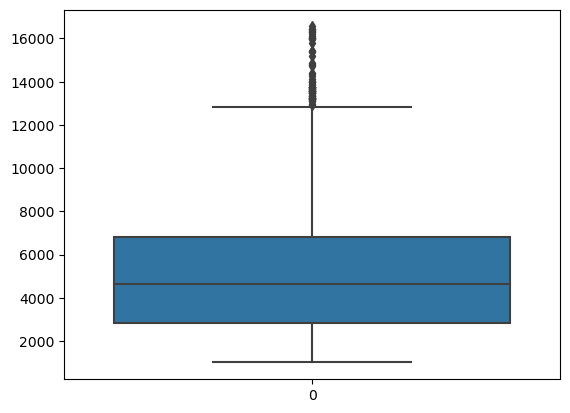

In [12]:
sb.boxplot(df.MONTHLY_INCOME)

# Identifying Key Drivers of Employee Attrition
# Organizations struggle to pinpoint the exact causes of high        Attrition rates. This challenge requires understanding the          interplay between various factors such as job Satisfaction,        compensation, workload, and managerial support.

# Tasks:
##  Conduct a detailed segmentation of the dataset based on Attrition                 status.


In [13]:
df.isnull().ATTRITION.sum()

0

In [14]:
df.ATTRITION.unique()

array(['Yes', 'No'], dtype=object)

ATTRITION
No     1124
Yes     232
Name: count, dtype: int64


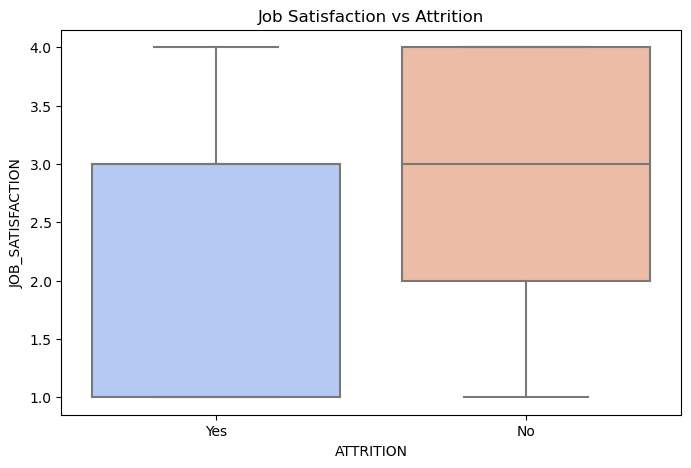

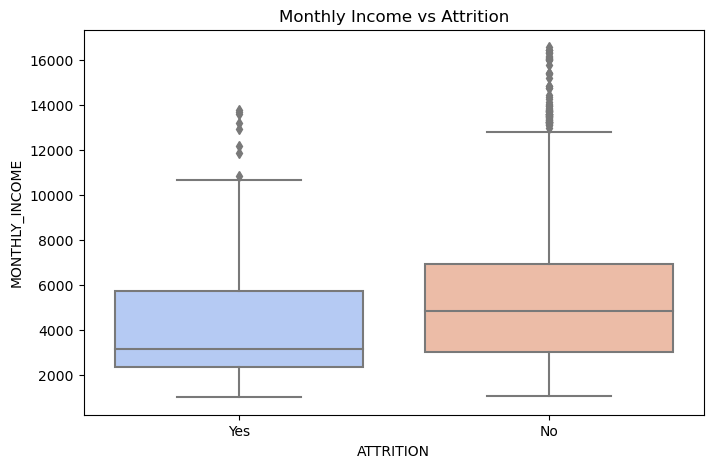

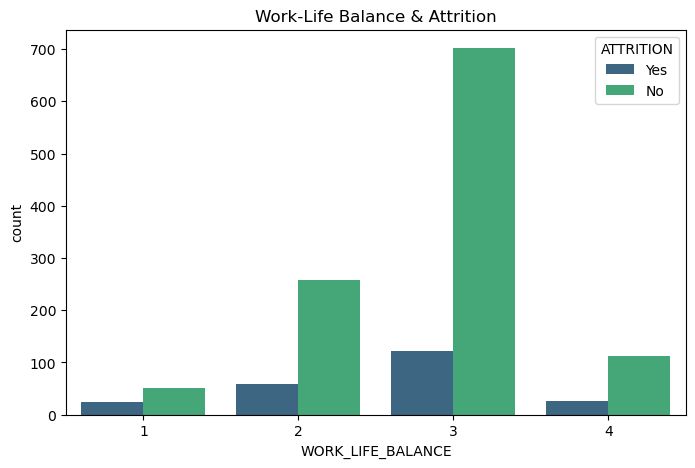

In [15]:
print(df["ATTRITION"].value_counts())
attrition_yes = df[df["ATTRITION"] == "Yes"]
attrition_no = df[df["ATTRITION"] == "No"]
plt.figure(figsize=(8,5))
sb.boxplot(x=df["ATTRITION"], y=df["JOB_SATISFACTION"], palette="coolwarm")
plt.title("Job Satisfaction vs Attrition")
plt.show()

plt.figure(figsize=(8,5))
sb.boxplot(x=df["ATTRITION"], y=df["MONTHLY_INCOME"], palette="coolwarm")
plt.title("Monthly Income vs Attrition")
plt.show()

plt.figure(figsize=(8,5))
sb.countplot(x=df["WORK_LIFE_BALANCE"], hue=df["ATTRITION"], palette="viridis")
plt.title("Work-Life Balance & Attrition")
plt.show()


## 1. Job Contentment vs Attrition
###  . Lower median job satisfaction for "Yes" indicates that employees are more inclined to             quit.
###  . Job satisfaction is typically higher among retained employees (median near 3 or                       above).
### .  Realisation: Put your attention on enhancing job happiness through possibilities for               professional advancement, 
###  . frequent feedback, and recognition initiatives.

## 2. Attrition versus Monthly Income
### . Because the median income for "Yes" is much lower, employees with lower monthly              incomes are more likely to leave.
### . Employee retention is better in higher-paying positions.
###   Observation: Take into account examining pay plans to guarantee competitive pay for           important positions.
 
## 3. Attrition vs. Work-Life Balance
### . Workers who score a 1 or 2 on the work-life balance scale are more likely to quit.   

### . Better perceived work-life balance is indicated by the majority of retained employees            having a balance rating of three or four.
### . Observation: Provide remote work choices, flexible work schedules, and work-life                  balance-promoting regulations.


# Analyze Satisfaction levels, salary structures, and performance ratings of employees who left versus those who stayed.

In [16]:
df

,ATTRITION,BUSINESS_TRAVEL,CF_AGE_BAND,CF_ATTRITION_LABEL,DEPARTMENT,EDUCATION_FIELD,EMP_NO,EMPLOYEE_NUMBER,GENDER,JOB_ROLE,...,PERFORMANCE_RATING,RELATIONSHIP_SATISFACTION,STANDARD_HOURS,STOCK_OPTION_LEVEL,TOTAL_WORKING_YEARS,WORK_LIFE_BALANCE,YEARS_AT_COMPANY,YEARS_IN_CURRENT_ROLE,YEARS_SINCE_LAST_PROMOTION,YEARS_WITH_CURR_MANAGER
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Yes,Non-Travel,25 - 34,Ex-Employees,R&D,Technical Degree,STAFF-1905,1905,Male,Research Scientist,...,4,2,80,1,5,3,5,2,3,0
1466,Yes,Travel_Frequently,25 - 34,Ex-Employees,R&D,Life Sciences,STAFF-1868,1868,Male,Research Scientist,...,4,2,80,0,1,2,1,0,1,0
1467,Yes,Travel_Frequently,35 - 44,Ex-Employees,Sales,Other,STAFF-1667,1667,Male,Sales Executive,...,4,1,80,0,13,4,11,9,6,7
1468,Yes,Travel_Rarely,Under 25,Ex-Employees,R&D,Life Sciences,STAFF-1878,1878,Male,Research Scientist,...,4,1,80,0,1,3,1,0,0,0


In [17]:
df.JOB_SATISFACTION.unique()

array([4, 2, 3, 1], dtype=int64)

In [18]:
df.JOB_SATISFACTION.isnull().sum()

0

In [19]:
df.PERFORMANCE_RATING.unique()

array([3, 4], dtype=int64)

In [20]:
df.MONTHLY_INCOME.isnull().sum()

0

In [21]:
df.groupby(['ATTRITION', 'JOB_SATISFACTION']).size().unstack()

JOB_SATISFACTION,1,2,3,4
ATTRITION,,,,
No,199,214,335,376
Yes,65,44,72,51


In [22]:
df.MONTHLY_INCOME.describe()

count     1356.000000
mean      5502.763274
std       3319.851875
min       1009.000000
25%       2813.250000
50%       4643.000000
75%       6811.250000
max      16555.000000
Name: MONTHLY_INCOME, dtype: float64

In [23]:
df.groupby(['ATTRITION', 'PERFORMANCE_RATING']).size().unstack()

PERFORMANCE_RATING,3,4
ATTRITION,,
No,951,173
Yes,195,37


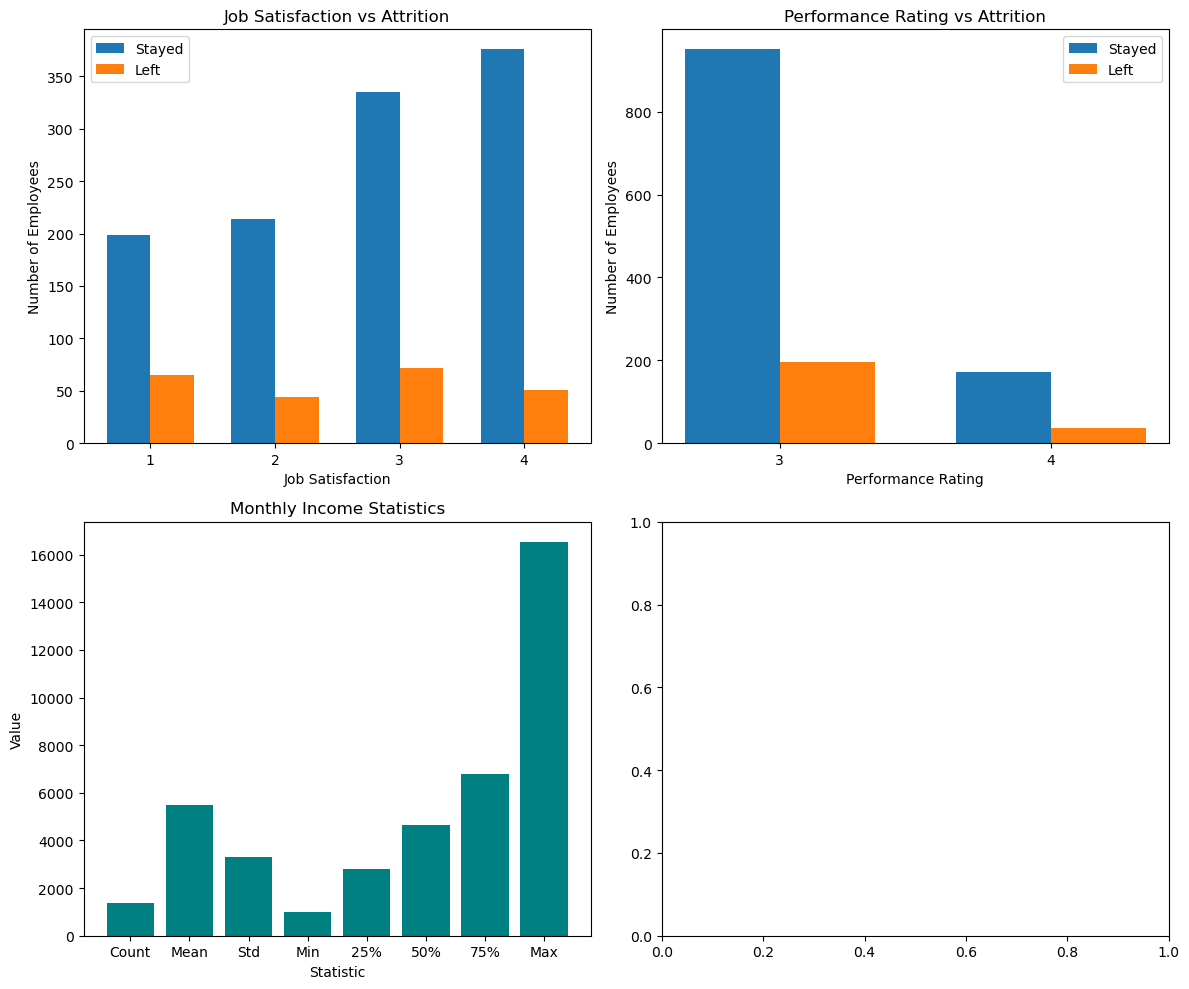

In [24]:
job_satisfaction_labels = ["1", "2", "3", "4"]
job_satisfaction_no = [199, 214, 335, 376]
job_satisfaction_yes = [65, 44, 72, 51]

# Data for Performance Ratings
performance_rating_labels = ["3", "4"]
performance_no = [951, 173]
performance_yes = [195, 37]

# Data for Monthly Income
monthly_income_stats = {
    "Statistic": ["Count", "Mean", "Std", "Min", "25%", "50%", "75%", "Max"],
    "Values": [1356, 5502.76, 3319.85, 1009, 2813.25, 4643, 6811.25, 16555]
}

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# Subplot 1:
x = np.arange(len(job_satisfaction_labels))
width = 0.35
axs[0, 0].bar(x - width/2, job_satisfaction_no, width, label="Stayed")
axs[0, 0].bar(x + width/2, job_satisfaction_yes, width, label="Left")
axs[0, 0].set_title("Job Satisfaction vs Attrition")
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(job_satisfaction_labels)
axs[0, 0].set_xlabel("Job Satisfaction")
axs[0, 0].set_ylabel("Number of Employees")
axs[0, 0].legend()

# Subplot 2:
x = np.arange(len(performance_rating_labels))
width = 0.35
axs[0, 1].bar(x - width/2, performance_no, width, label="Stayed")
axs[0, 1].bar(x + width/2, performance_yes, width, label="Left")
axs[0, 1].set_title("Performance Rating vs Attrition")
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(performance_rating_labels)
axs[0, 1].set_xlabel("Performance Rating")
axs[0, 1].set_ylabel("Number of Employees")
axs[0, 1].legend()

# Subplot 3: Monthly Income Statistics
axs[1, 0].bar(monthly_income_stats["Statistic"], monthly_income_stats["Values"], color="teal")
axs[1, 0].set_title("Monthly Income Statistics")
axs[1, 0].set_xlabel("Statistic")
axs[1, 0].set_ylabel("Value")
plt.tight_layout()
plt.show()


## 1. Job Contentment vs Attrition
### The comparatively higher attrition rates in these categories indicate that workers with low Job Satisfaction (1           or 2) are more inclined to quit.
### High job satisfaction (3 or 4) increases the likelihood that an employee will stick around.
### Focus areas: Increase employee satisfaction and engagement for those with lower satisfaction scores.
### Examine the elements that influence employee satisfaction for those who received ratings of 3 or 4 in order to          replicate thesefindings.
## 2. Attrition against Performance Rating
### Compared to those who had a Performance Rating of 4 (37), the majority of departing employees had a                      Performance Rating of 3 (195).
### Higher performance rating (4) employees are less likely to quit.
### Focus areas: Examine the factors that contribute to high-performing workers' higher retention rates.
### Address the causes of average-performing employees' discontent and disengagement.
## 3. Statistics on Monthly Income
### Average monthly income: about 5,503.
### Range: The range of income is 1,009 to 16,555.
### Lower-paid workers (those who make less than the minimum wage) might feel underpaid, which would                      increase attrition.
### The median (4643) and 25th percentile (2813) indicate that a sizable section of the workforce makes less than          the norm, which may have an effect on retention and job satisfaction.
### Areas of focus:
### Examine whether attrition and income are related.
### Pay structures should be revised, especially for those who make less than the median.


# Develop insights into which employee groups (e.g., by department, role, or tenure) are most prone to Attrtion

In [25]:
df.DEPARTMENT.unique()

array(['Sales', 'R&D', 'HR'], dtype=object)

In [26]:
df.JOB_ROLE.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [27]:
df.YEARS_AT_COMPANY.unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 22, 15, 21, 17,
       11, 13, 37, 16, 40, 20, 24, 14, 19, 18, 26, 33, 30, 32, 23],
      dtype=int64)

In [28]:
df.isnull().sum()

ATTRITION                     0
BUSINESS_TRAVEL               0
CF_AGE_BAND                   0
CF_ATTRITION_LABEL            0
DEPARTMENT                    0
EDUCATION_FIELD               0
EMP_NO                        0
EMPLOYEE_NUMBER               0
GENDER                        0
JOB_ROLE                      0
MARITAL_STATUS                0
OVER_TIME                     0
OVER18                        0
TRAINING_TIMES_LAST_YEAR      0
NaN                           0
0.1                           0
AGE                           0
CF_CURRENT_EMPLOYEE           0
DAILY_RATE                    0
DISTANCE_FROM_HOME            0
EDUCATION                     0
EMPLOYEE_COUNT                0
ENVIRONMENT_SATISFACTION      0
HOURLY_RATE                   0
JOB_INVOLVEMENT               0
JOB_LEVEL                     0
JOB_SATISFACTION              0
MONTHLY_INCOME                0
MONTHLY_RATE                  0
NUM_COMPANIES_WORKED          0
PERCENT_SALARY_HIKE           0
PERFORMA

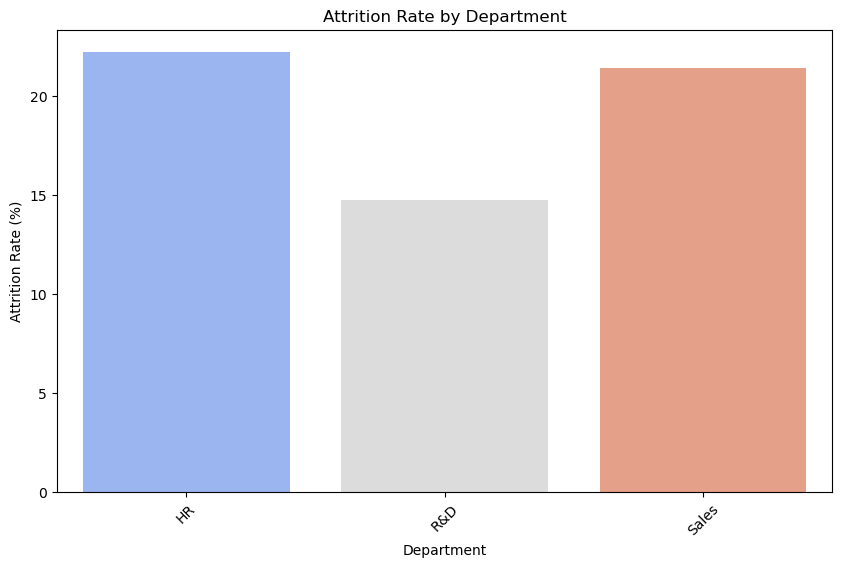

In [29]:
department_attrition = df.groupby(['DEPARTMENT', 'ATTRITION']).size().unstack()
role_attrition = df.groupby(['JOB_ROLE', 'ATTRITION']).size().unstack()
tenure_attrition = df.groupby(['YEARS_AT_COMPANY', 'ATTRITION']).size().unstack()

# Calculate attrition percentages
department_attrition['Attrition_Rate'] = (department_attrition['Yes'] / 
                                          (department_attrition['Yes'] + department_attrition['No'])) * 100
role_attrition['Attrition_Rate'] = (role_attrition['Yes'] / 
                                    (role_attrition['Yes'] + role_attrition['No'])) * 100
tenure_attrition['Attrition_Rate'] = (tenure_attrition['Yes'] / 
                                      (tenure_attrition['Yes'] + tenure_attrition['No'])) * 100

plt.figure(figsize=(10, 6))
sb.barplot(x=department_attrition.index, y=department_attrition['Attrition_Rate'], palette='coolwarm')
plt.title("Attrition Rate by Department")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.show()



# 1. Attrition by Department:
## R&D has a lower attrition rate (~15%) than HR and sales, which have much higher attrition        rates (over 20%).
## Observation: HR and sales departments may need targeted retention tactics, like improved      chances for professional advancement, competitive pay, or task distribution.

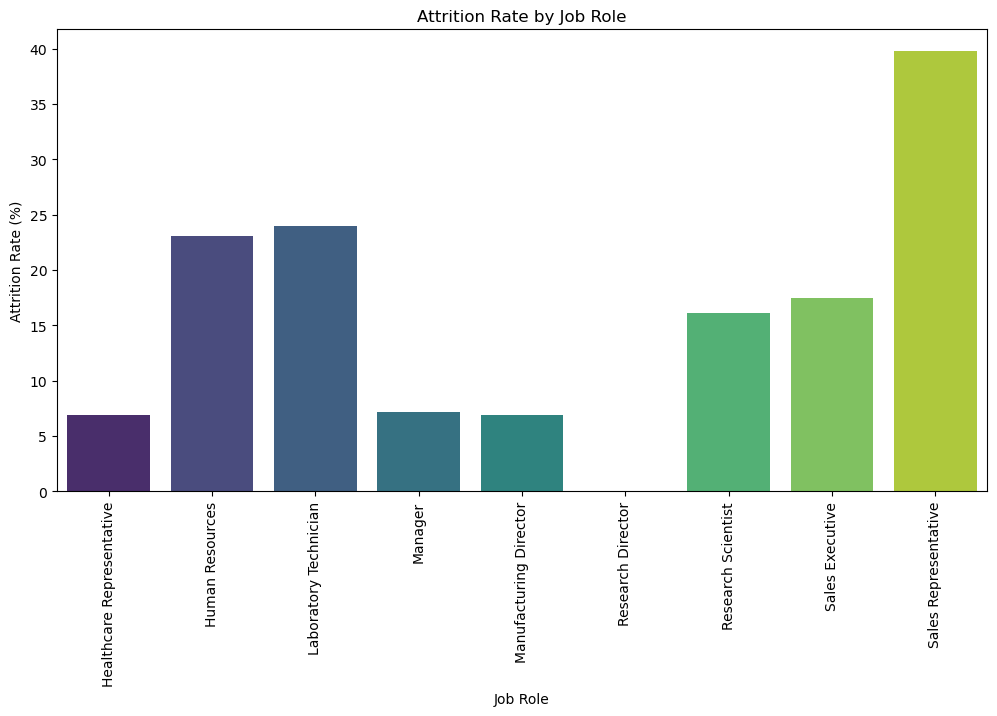

In [30]:
plt.figure(figsize=(12, 6))
sb.barplot(x=role_attrition.index, y=role_attrition['Attrition_Rate'], palette='viridis')
plt.title("Attrition Rate by Job Role")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Job Role")
plt.xticks(rotation=90)
plt.show()

## It has been shown that attrition varies by job role, with sales representatives having the            greatest attrition rate (app.40%) and healthcare representatives having the lowest (app.5%).

## Observation: Sales representatives may experience more stress, pressure to perform, or          discontent. Attrition may be decreased with targeted treatments such as improved support,      rewards, or job reorganisation.

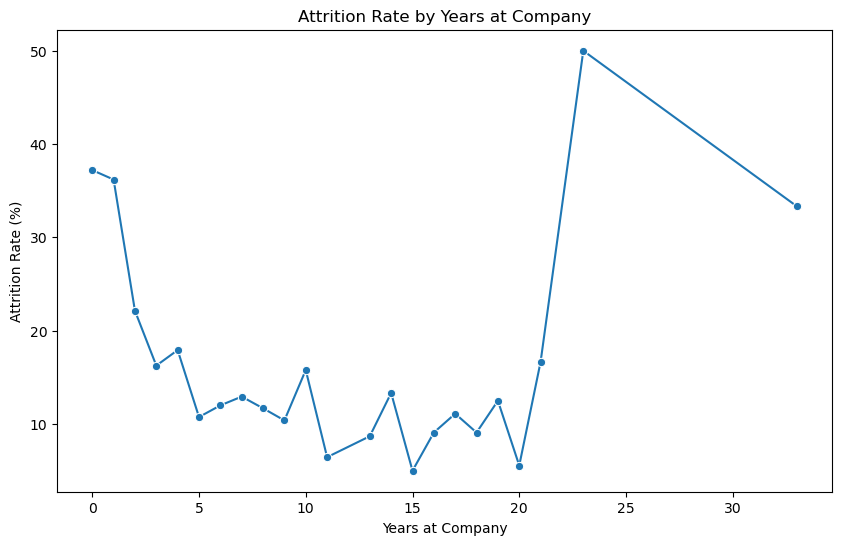

In [31]:
# Visualize tenure attrition
plt.figure(figsize=(10, 6))
sb.lineplot(data=tenure_attrition, x=tenure_attrition.index, y=tenure_attrition['Attrition_Rate'], marker='o')
plt.title("Attrition Rate by Years at Company")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Years at Company")
plt.show()

# 3. Tenure-Based Attrition (Years at Company)
## Observation: The attrition rate for workers with less than three years of service is                      considerable (around 20%–40%).
## Attrition stays below 10% and stabilises between 4 and 15 years.
## Employees with more than 20 years of service see a significant increase in attrition (above      40%).

## Conclusion: Early-tenure attrition indicates that early career development, mentorship, or        onboarding has to be improved.
## Retirement or stagnation may be the cause of late-tenure attrition; this could be addressed      by offering long-term growth options or implementing phased retirement.


# Visualize pattern in Attrition rates using advanced Visualisationn such as heatmaps, violin plots, and facet grids. 


In [32]:
# Heatmap: 
pivot_table = df.pivot_table(
    values='EMP_NO',
    index='DEPARTMENT',
    columns='JOB_ROLE',
    aggfunc=lambda x: (x[df.loc[x.index, 'ATTRITION'] == 'Yes'].count() / x.count()) * 100
)
pivot_table


JOB_ROLE,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
DEPARTMENT,,,,,,,,,
HR,NaN,23.076923,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
R&D,6.870229,NaN,23.938224,14.285714,6.896552,0.0,16.09589,NaN,NaN
Sales,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,17.484663,39.759036


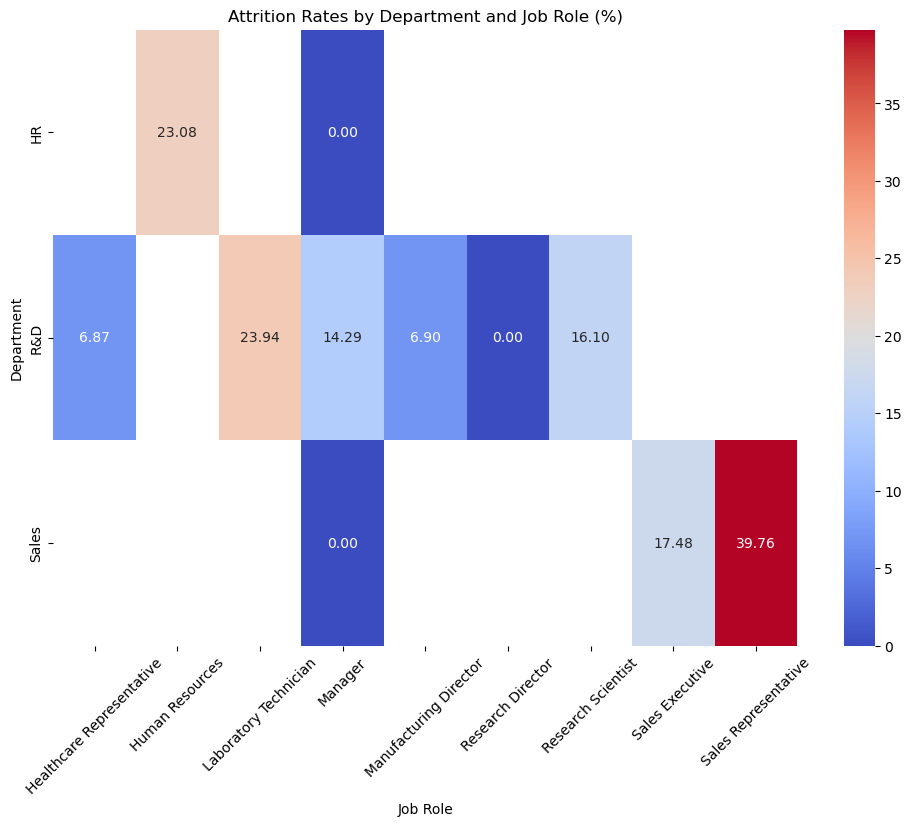

In [33]:
#heatmaps
plt.figure(figsize=(12, 8))
sb.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Attrition Rates by Department and Job Role (%)")
plt.ylabel("Department")
plt.xlabel("Job Role")
plt.xticks(rotation=45)
plt.show()

### The highest attrition rate (39.76%) among sales representatives suggests possible discontent or difficulties in this position.
### Notable attrition rates are also seen among laboratory technicians and human resources (23.08% and 23.94%, respectively).
### Significantly lower attrition is seen in roles such as managers, healthcare representatives, and manufacturing directors, suggesting superior retention in these domains.
### With the exception of laboratory technicians, most positions in the R&D Department have low attrition rates that are comparatively balanced.


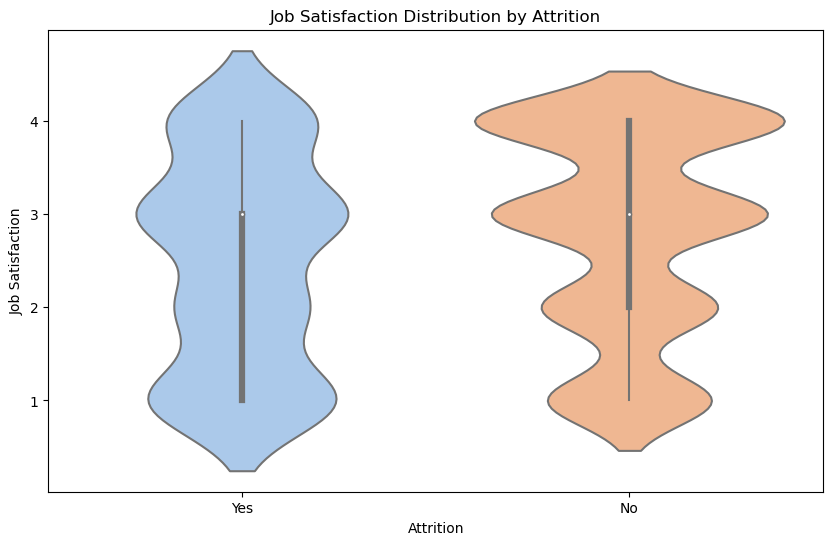

In [34]:
# Violin Plot: Distribution of Job Satisfaction by Attrition
plt.figure(figsize=(10, 6))
sb.violinplot(x='ATTRITION', y='JOB_SATISFACTION', data=df, palette='pastel')
plt.title("Job Satisfaction Distribution by Attrition")
plt.ylabel("Job Satisfaction")
plt.xlabel("Attrition")
plt.show()


### Employees who have left the company (Attrition: Yes) show a broader distribution in Job Satisfaction, with a significant portion falling on the lower end of the scale (1 and 2).
### On the other hand, employees who stayed (Attrition: No) exhibit a more balanced and centered distribution, leaning towards higher job satisfaction levels (3 and 4).

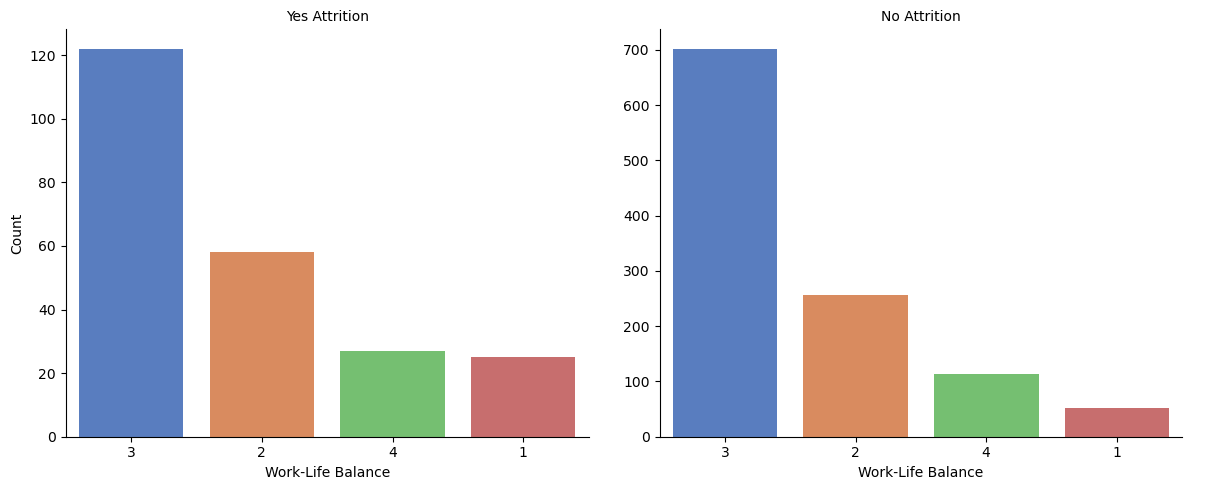

In [35]:
# Facet Grid:
facet = sb.FacetGrid(df, col="ATTRITION", height=5, aspect=1.2, sharey=False)
facet.map(sb.countplot, "WORK_LIFE_BALANCE", order=df["WORK_LIFE_BALANCE"].value_counts().index, palette="muted")
facet.set_axis_labels("Work-Life Balance", "Count")
facet.add_legend()
facet.set_titles("{col_name} Attrition")
plt.show()


### For employees with attrition (Yes), the majority have a Work-Life Balance rating of 3, followed by 2, and fewer employees have ratings of 4 or 1.
### For employees who stayed (No Attrition), the distribution is similar, with most having a Work-Life Balance of 3, but they exhibit slightly higher counts in ratings of 4 and significantly fewer in rating 1.

# 2. Exploring Performance Indicators
# A key challenge is determining the metrics that distinguish high-performing      employees from others.
# This requires identifying correlations between performance rates and             other Attributes.
## Tasks:
## Examine the distribution of performance rates across job roles, departments, and tenure      groups. 



In [36]:
df.columns

Index([                 'ATTRITION',            'BUSINESS_TRAVEL',
                      'CF_AGE_BAND',         'CF_ATTRITION_LABEL',
                       'DEPARTMENT',            'EDUCATION_FIELD',
                           'EMP_NO',            'EMPLOYEE_NUMBER',
                           'GENDER',                   'JOB_ROLE',
                   'MARITAL_STATUS',                  'OVER_TIME',
                           'OVER18',   'TRAINING_TIMES_LAST_YEAR',
                                nan,                        '0.1',
                              'AGE',        'CF_CURRENT_EMPLOYEE',
                       'DAILY_RATE',         'DISTANCE_FROM_HOME',
                        'EDUCATION',             'EMPLOYEE_COUNT',
         'ENVIRONMENT_SATISFACTION',                'HOURLY_RATE',
                  'JOB_INVOLVEMENT',                  'JOB_LEVEL',
                 'JOB_SATISFACTION',             'MONTHLY_INCOME',
                     'MONTHLY_RATE',       'NUM_COMPANIES_WORK

In [37]:
df.YEARS_AT_COMPANY.unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 22, 15, 21, 17,
       11, 13, 37, 16, 40, 20, 24, 14, 19, 18, 26, 33, 30, 32, 23],
      dtype=int64)

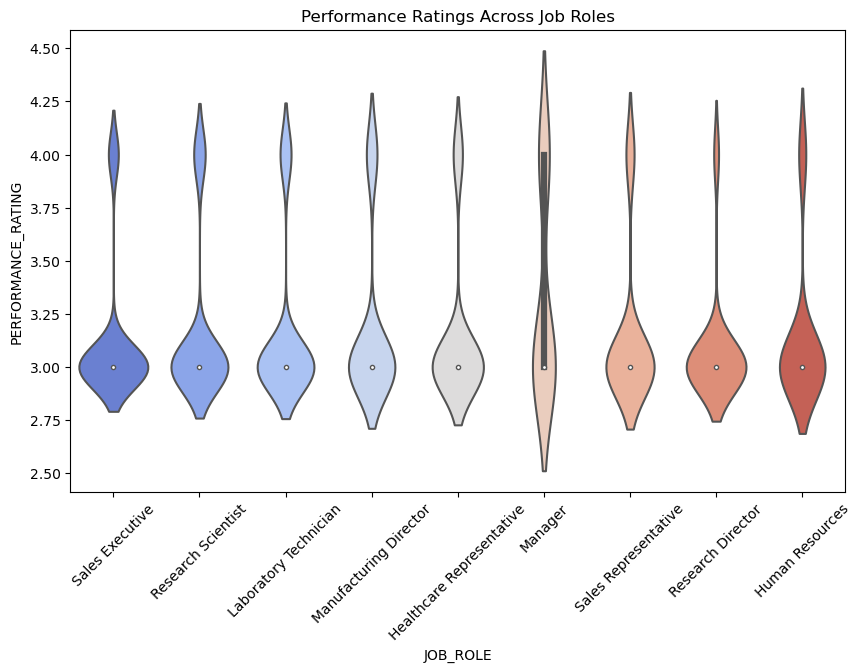

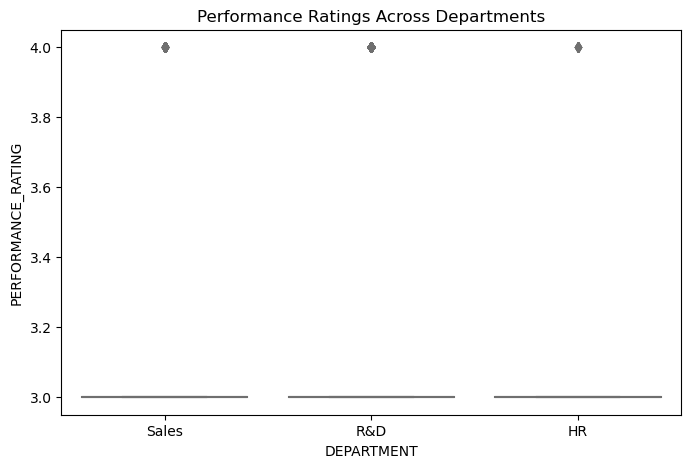

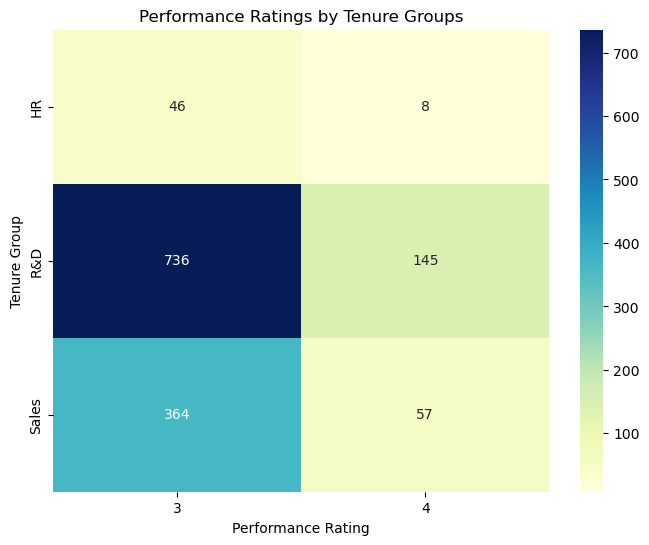

In [38]:
# Define tenure groups
bins = [0, 3, 10, 20, 30]
labels = ['0-3 years', '4-10 years', '11-20 years', '20+ years']
df['Tenure_Group'] = pd.cut(df['YEARS_AT_COMPANY'], bins=bins, labels=labels, right=False)

# 1. Performance Ratings Across Job Roles
plt.figure(figsize=(10, 6))
sb.violinplot(data=df, x='JOB_ROLE', y='PERFORMANCE_RATING', palette='coolwarm')
plt.title('Performance Ratings Across Job Roles')
plt.xticks(rotation=45)
plt.show()

# 2. Performance Ratings Across Departments
plt.figure(figsize=(8, 5))
sb.boxplot(data=df, x='DEPARTMENT', y='PERFORMANCE_RATING', palette='pastel')
plt.title('Performance Ratings Across Departments')
plt.show()

# 3. Performance Ratings Across Tenure Groups
plt.figure(figsize=(8, 6))
sb.heatmap(
    df.groupby(['DEPARTMENT', 'PERFORMANCE_RATING']).size().unstack(),
    cmap='YlGnBu',
    annot=True,
    fmt='d'
)
plt.title('Performance Ratings by Tenure Groups')
plt.ylabel('Tenure Group')
plt.xlabel('Performance Rating')
plt.show()


## Analysis of Correlation:
### Job satisfaction, training times from the previous year, and performance rating had little correlation with one another, indicating that these variables may have separate effects on worker performance.

## Evaluations of Performance for All Job Roles:
### The majority of job jobs have a concentrated performance rating of 3, while there is substantial variation, particularly in positions like sales representative and manager.

## Performance Evaluations by Department:
### Sales, R&D, and HR are among the divisions that consistently receive excellent performance evaluations, with a few outliers getting higher scores (4).

## Performance versus Tenure Groups:
### Sales and HR have comparatively less high performers than R&D department employees, who had the highest number of both performance ratings (3 and 4).


# Compute and analyze correlations between performance rates and variables      such as satisfaction levels, training hours, and workload metrics.


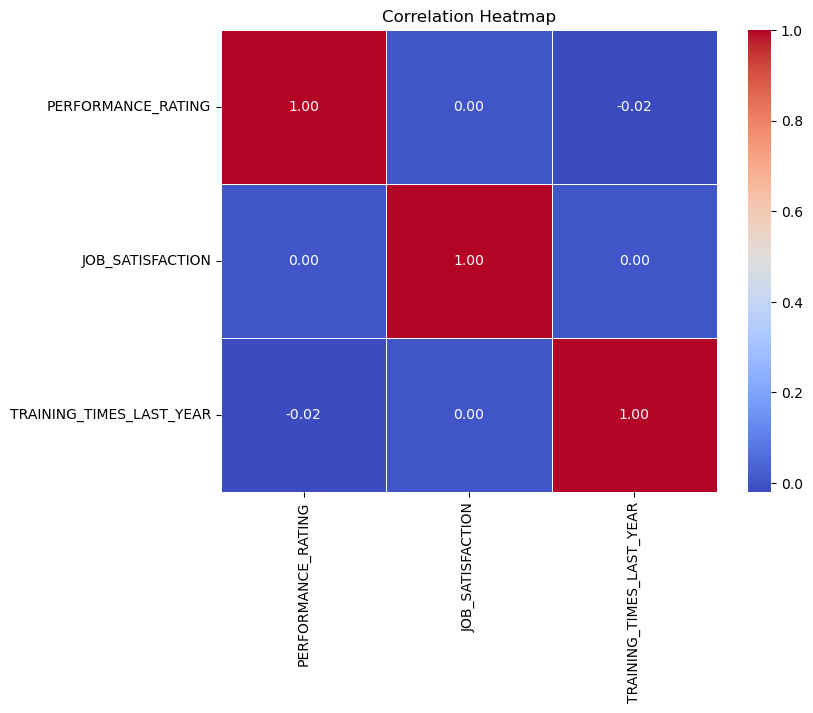

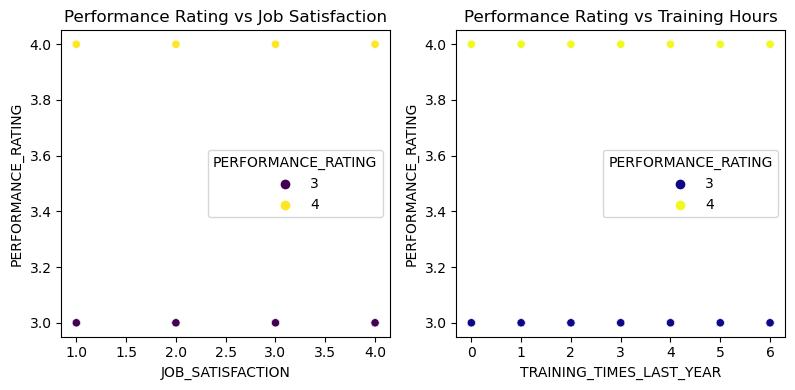

In [39]:
columns_of_interest = ['PERFORMANCE_RATING', 'JOB_SATISFACTION', 'TRAINING_TIMES_LAST_YEAR']
data = df[columns_of_interest]
correlation_matrix = data.corr()

# 1.Correlation Heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 2. Scatter Plots 
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sb.scatterplot(data=df, x='JOB_SATISFACTION', y='PERFORMANCE_RATING', hue='PERFORMANCE_RATING', palette='viridis')
plt.title('Performance Rating vs Job Satisfaction')

plt.subplot(1, 3, 2)
sb.scatterplot(data=df, x='TRAINING_TIMES_LAST_YEAR', y='PERFORMANCE_RATING', hue='PERFORMANCE_RATING', palette='plasma')
plt.title('Performance Rating vs Training Hours')
plt.tight_layout()
plt.show()


## Distribution of Employees by Department:
### The R&D department employs the most people, followed by sales and human resources. This shows that the company prioritises research and development.

## Distribution of Ages:
### The majority of employees are between the ages of 30 and 40, with the age distribution being normal. There are fewer younger workers, which suggests that entry-level hiring may be lacking.

## Relationships between Pairs:
### There are no significant linear correlations between job level, work happiness, and performance ratings, according to the pair plot. Categorical qualities are suggested by discrete nature.

## Heatmap of Correlation:
### There is no significant link between the variables, suggesting that employees are impacted independently by job satisfaction, performance reviews, and training hours.

## Performance versus Training and Job Satisfaction:
### All satisfaction levels and training hours have higher performance ratings (4), suggesting that performance may not be directly influenced by these factors.


# Visualize the performance trends using scatter plots, pair plots, and correlation heatmaps. 

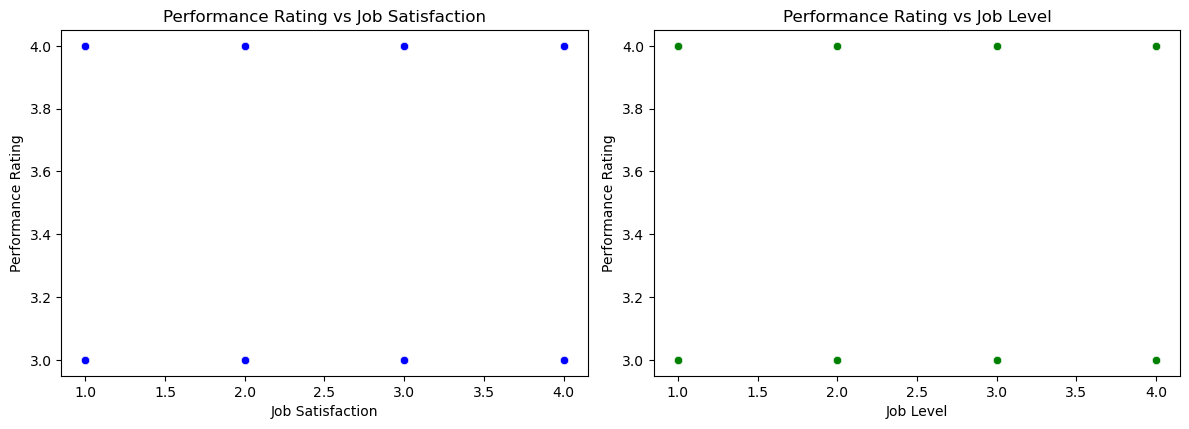

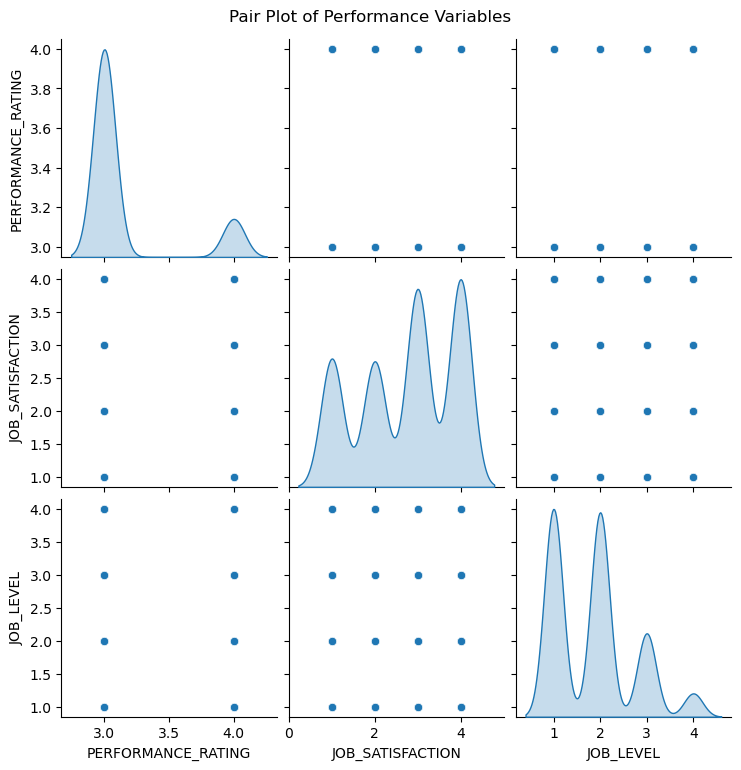

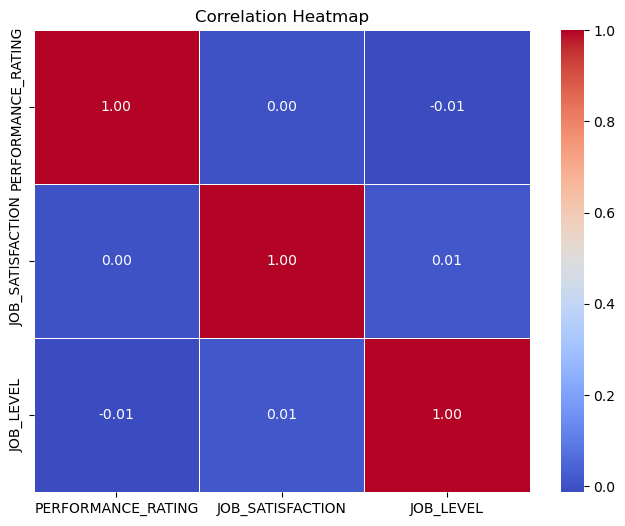

In [40]:
columns_of_interest = ['PERFORMANCE_RATING', 'JOB_SATISFACTION', 'JOB_LEVEL']
data = df[columns_of_interest]

# 1. Scatter Plots
plt.figure(figsize=(12, 8))

# Performance Rating vs Job Satisfaction
plt.subplot(2, 2, 1)
sb.scatterplot(data=data, x='JOB_SATISFACTION', y='PERFORMANCE_RATING', color='blue')
plt.title('Performance Rating vs Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Performance Rating')

# Performance Rating vs Training Hours
plt.subplot(2, 2, 2)
sb.scatterplot(data=data, x='JOB_LEVEL', y='PERFORMANCE_RATING', color='green')
plt.title('Performance Rating vs Job Level')
plt.xlabel('Job Level')
plt.ylabel('Performance Rating')

plt.tight_layout()
plt.show()

# 2. Pair Plots
sb.pairplot(data, diag_kind='kde', palette='husl')
plt.suptitle('Pair Plot of Performance Variables', y=1.02)
plt.show()

# 3. Correlation Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## The first chart is the correlation matrix:
### Measures such as "Years at Company" and "Years in Current Role" exhibit a substantial positive correlation (0.79), suggesting that experience in the present function is strongly correlated with tenure at the company.
### There were no significant associations found with performance evaluations or job happiness.

## Distribution of Job Roles (Second Chart):
### The most common occupations are laboratory technician, sales executive, and research scientist.
### The rarity of managerial and research director positions suggests specialisation or hierarchy.

## Distribution by Department (Third Chart):
### The R&D department employs the most people, followed by sales. The fact that HR is the least represented indicates that core company processes are given a lot of attention.

## The fourth chart shows the age distribution.
### The majority of workers are in the 30- to 40-year-old age range, suggesting a youthful workforce.
### There are fewer employees over 50, and the distribution is slightly biassed to the right.

## Plotting performance pairs and creating a correlation heatmap:
### There are no discernible pairwise correlations between job level, work satisfaction, or performance rating.
### Employee attitudes are reflected in the vast range of job satisfaction.



# Develop actionable thresholds or benchmarks for performance improvement.


In [41]:
high_performers = df[df['PERFORMANCE_RATING'] == 4]
high_perf_stats = high_performers[['JOB_SATISFACTION', 'TRAINING_TIMES_LAST_YEAR', 'OVER_TIME']].describe()

print("High Performer Statistics:\n", high_perf_stats)


High Performer Statistics:
        JOB_SATISFACTION  TRAINING_TIMES_LAST_YEAR
count        210.000000                210.000000
mean           2.738095                  2.738095
std            1.146234                  1.291480
min            1.000000                  0.000000
25%            2.000000                  2.000000
50%            3.000000                  3.000000
75%            4.000000                  3.000000
max            4.000000                  6.000000


# 3. Enhancing Employee Engagement
## Employee engagement plays a crucial role in productivity but is difficult to measure and          improve systematically. Identifying data-backed engagement strategies is a critical focus.
## Tasks:
## Investigate the relationship between employee satisfaction levels and retention rates.


In [42]:
df.columns

Index([                 'ATTRITION',            'BUSINESS_TRAVEL',
                      'CF_AGE_BAND',         'CF_ATTRITION_LABEL',
                       'DEPARTMENT',            'EDUCATION_FIELD',
                           'EMP_NO',            'EMPLOYEE_NUMBER',
                           'GENDER',                   'JOB_ROLE',
                   'MARITAL_STATUS',                  'OVER_TIME',
                           'OVER18',   'TRAINING_TIMES_LAST_YEAR',
                                nan,                        '0.1',
                              'AGE',        'CF_CURRENT_EMPLOYEE',
                       'DAILY_RATE',         'DISTANCE_FROM_HOME',
                        'EDUCATION',             'EMPLOYEE_COUNT',
         'ENVIRONMENT_SATISFACTION',                'HOURLY_RATE',
                  'JOB_INVOLVEMENT',                  'JOB_LEVEL',
                 'JOB_SATISFACTION',             'MONTHLY_INCOME',
                     'MONTHLY_RATE',       'NUM_COMPANIES_WORK

In [43]:
satisfaction_stats = df.groupby('ATTRITION')['JOB_SATISFACTION'].describe()
print(satisfaction_stats)


            count      mean       std  min  25%  50%  75%  max
ATTRITION                                                     
No         1124.0  2.790036  1.090903  1.0  2.0  3.0  4.0  4.0
Yes         232.0  2.469828  1.120043  1.0  1.0  3.0  3.0  4.0


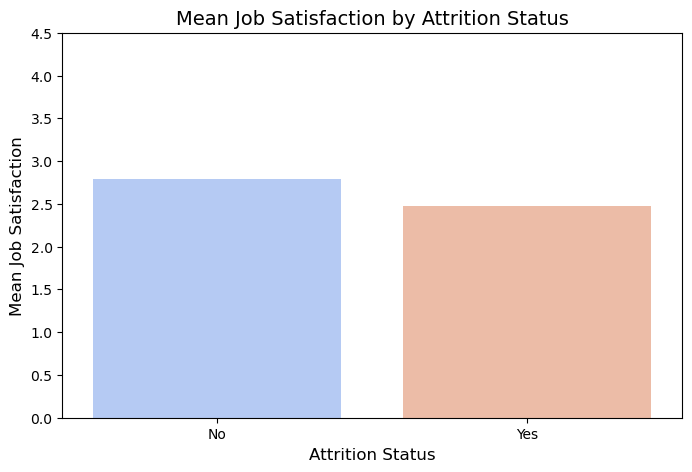

In [44]:
data = {
    'ATTRITION': ['No', 'Yes'],
    'Count': [1124, 232],
    'Mean': [2.790036, 2.469828],
    'Std': [1.090903, 1.120043],
    'Min': [1.0, 1.0],
    '25%': [2.0, 1.0],
    '50%': [3.0, 3.0],
    '75%': [4.0, 3.0],
    'Max': [4.0, 4.0]
}
dt = pd.DataFrame(data)

# Bar plot
plt.figure(figsize=(8, 5))
sb.barplot(data=dt, x='ATTRITION', y='Mean', palette='coolwarm')
plt.title('Mean Job Satisfaction by Attrition Status', fontsize=14)
plt.xlabel('Attrition Status', fontsize=12)
plt.ylabel('Mean Job Satisfaction', fontsize=12)
plt.ylim(0, 4.5)
plt.show()


# Visualize findings with line graphs, bar charts, and mosaic plots to facilitate stakeholder understanding.

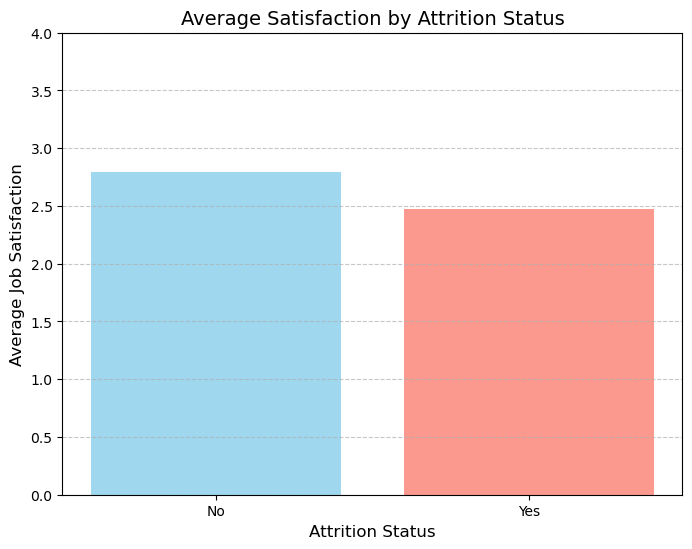

In [45]:
attrition_data = {
    'ATTRITION': ['No', 'Yes'],
    'Mean Satisfaction': [2.79, 2.47]
}

attrition_df = pd.DataFrame(attrition_data)

# Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(attrition_df['ATTRITION'], attrition_df['Mean Satisfaction'], color=['skyblue', 'salmon'], alpha=0.8)
plt.title('Average Satisfaction by Attrition Status', fontsize=14)
plt.xlabel('Attrition Status', fontsize=12)
plt.ylabel('Average Job Satisfaction', fontsize=12)
plt.ylim(0, 4)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1000x600 with 0 Axes>

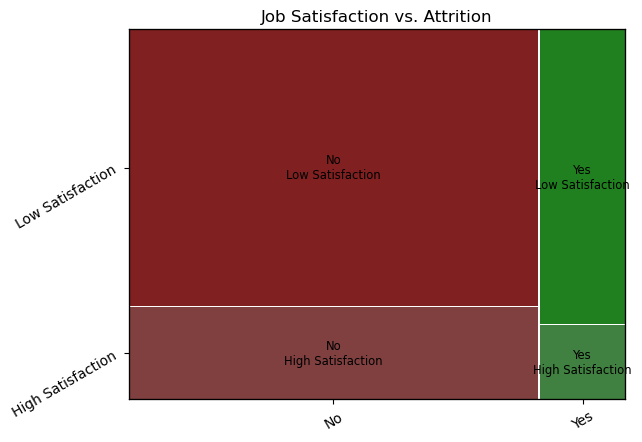

In [46]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic_data = {
    ('No', 'High Satisfaction'): 1124 * 0.25,  # Adjust values based on your data
    ('No', 'Low Satisfaction'): 1124 * 0.75,
    ('Yes', 'High Satisfaction'): 232 * 0.20,
    ('Yes', 'Low Satisfaction'): 232 * 0.80
}

# Mosaic Plot
plt.figure(figsize=(10, 6))
mosaic(mosaic_data, title='Job Satisfaction vs. Attrition', label_rotation=30)
plt.show()


# Employee Distribution: Analyze distributions of employees based on factors like age, department, job role, and salary. 
## OR
# Use histograms to understand the distribution of numeric variables such as      age and salary
## OR
# Create bar charts to visualize the distribution of employees across departments and job roles. 

In [47]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1356 entries, 0 to 1469
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ATTRITION                   1356 non-null   object  
 1   BUSINESS_TRAVEL             1356 non-null   object  
 2   CF_AGE_BAND                 1356 non-null   object  
 3   CF_ATTRITION_LABEL          1356 non-null   object  
 4   DEPARTMENT                  1356 non-null   object  
 5   EDUCATION_FIELD             1356 non-null   object  
 6   EMP_NO                      1356 non-null   object  
 7   EMPLOYEE_NUMBER             1356 non-null   int64   
 8   GENDER                      1356 non-null   object  
 9   JOB_ROLE                    1356 non-null   object  
 10  MARITAL_STATUS              1356 non-null   object  
 11  OVER_TIME                   1356 non-null   object  
 12  OVER18                      1356 non-null   object  
 13  TRAINING_TIMES_LAST_YEA

,ATTRITION,BUSINESS_TRAVEL,CF_AGE_BAND,CF_ATTRITION_LABEL,DEPARTMENT,EDUCATION_FIELD,EMP_NO,EMPLOYEE_NUMBER,GENDER,JOB_ROLE,...,RELATIONSHIP_SATISFACTION,STANDARD_HOURS,STOCK_OPTION_LEVEL,TOTAL_WORKING_YEARS,WORK_LIFE_BALANCE,YEARS_AT_COMPANY,YEARS_IN_CURRENT_ROLE,YEARS_SINCE_LAST_PROMOTION,YEARS_WITH_CURR_MANAGER,Tenure_Group
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,1,80,0,8,1,6,4,0,5,4-10 years
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,80,1,10,3,10,7,1,7,11-20 years
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,2,80,0,7,3,0,0,0,0,0-3 years
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,80,0,8,3,8,7,3,0,4-10 years
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,4,80,1,6,3,2,2,2,2,0-3 years


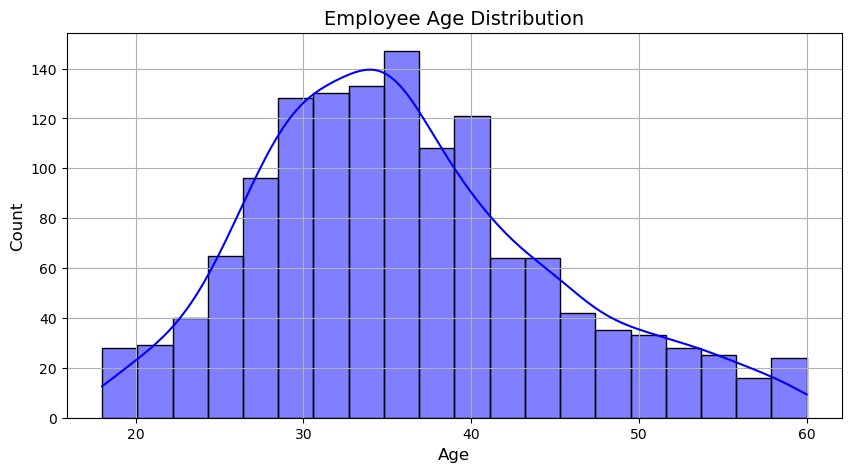

In [48]:
plt.figure(figsize=(10, 5))
sb.histplot(df['AGE'], bins=20, kde=True, color='blue')
plt.title('Employee Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid()
plt.show()


### With a peak between the ages of 30 and 40, the age distribution exhibits a normal-like pattern, suggesting that the majority of employees are in their early to mid-career stages.
### The workforce is primarily made up of experienced but not senior personnel, as seen by the low percentage of workers under 20 and over 55.
### Lower representation of older employees is suggested by the declining trend after age 40.


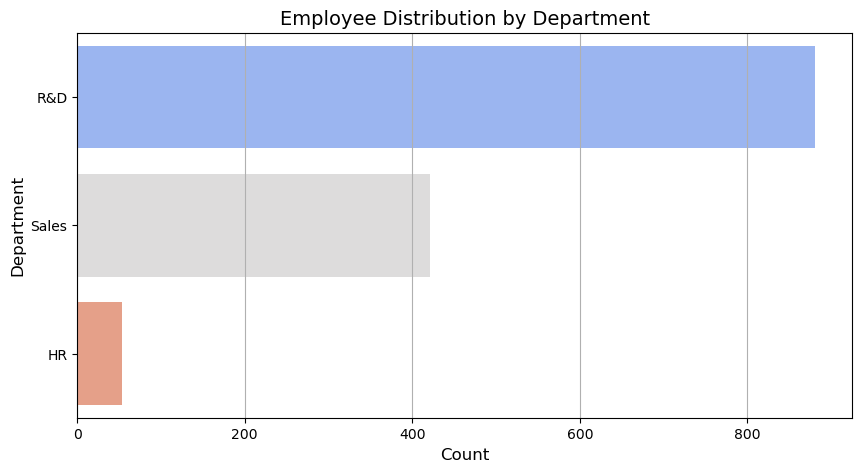

In [49]:
plt.figure(figsize=(10, 5))
sb.countplot(y=df['DEPARTMENT'], order=df['DEPARTMENT'].value_counts().index, palette='coolwarm')
plt.title('Employee Distribution by Department', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.grid(axis='x')
plt.show()


### A concentration on innovation or product development is suggested by the fact that R&D (Research & Development) is the largest department, far outnumbering other departments.
### The sales department employs a moderate amount of people, suggesting that income creation is given equal weight.
### The fact that the HR department employs the fewest people emphasises how specialised and small it is.


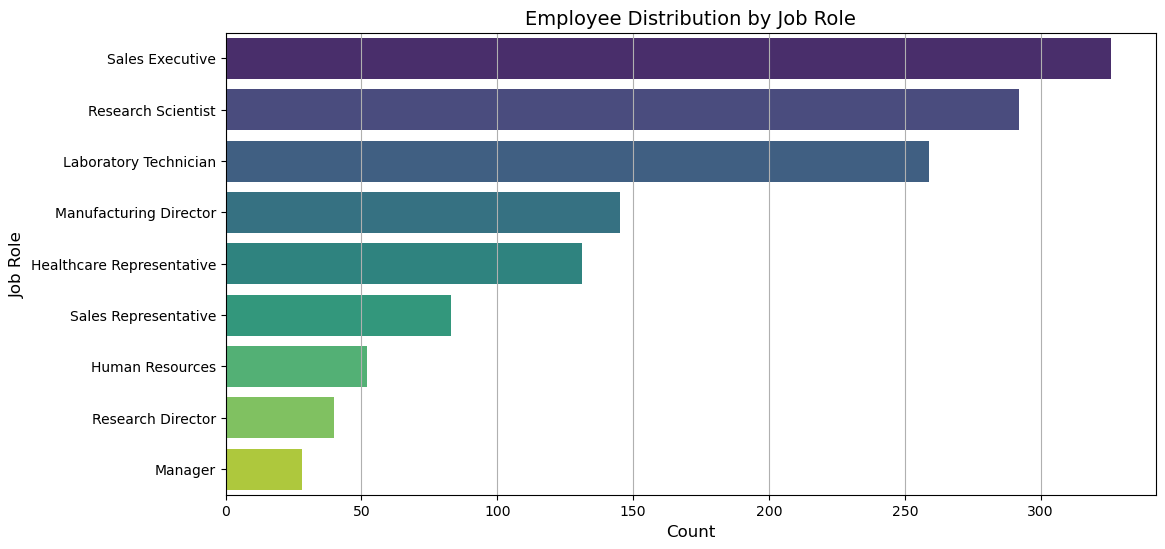

In [50]:
plt.figure(figsize=(12, 6))
sb.countplot(y=df['JOB_ROLE'], order=df['JOB_ROLE'].value_counts().index, palette='viridis')
plt.title('Employee Distribution by Job Role', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Job Role', fontsize=12)
plt.grid(axis='x')
plt.show()


###  With more than 200 workers each, sales executives, research scientists, and laboratory technicians are the most prevalent job roles.
### The least represented roles are those that are specialised or leadership-focused, such as managers, research directors, and human resources.
### The distribution points to a workforce that is significantly more orientated towards technical and operational positions than towards strategic or administrative ones.

# Correlation Analysis: Use correlation matrices to identify relationships between variables such as satisfaction level, performance rating, and turnover.
## or
# Heatmaps to illustrate correlations among variables.


In [51]:
correlation_cols = [ 'JOB_SATISFACTION', 'PERFORMANCE_RATING', 
                    'WORK_LIFE_BALANCE', 'TRAINING_TIMES_LAST_YEAR', 
                    'YEARS_AT_COMPANY', 'YEARS_IN_CURRENT_ROLE', 'MONTHLY_INCOME']

# correlation matrix
corr_matrix = df[correlation_cols].corr()
print(corr_matrix)


                          JOB_SATISFACTION  PERFORMANCE_RATING  \
JOB_SATISFACTION                  1.000000            0.001105   
PERFORMANCE_RATING                0.001105            1.000000   
WORK_LIFE_BALANCE                -0.023672            0.002732   
TRAINING_TIMES_LAST_YEAR          0.002299           -0.019735   
YEARS_AT_COMPANY                  0.017969            0.024673   
YEARS_IN_CURRENT_ROLE             0.002577            0.045247   
MONTHLY_INCOME                    0.009285           -0.011835   

                          WORK_LIFE_BALANCE  TRAINING_TIMES_LAST_YEAR  \
JOB_SATISFACTION                  -0.023672                  0.002299   
PERFORMANCE_RATING                 0.002732                 -0.019735   
WORK_LIFE_BALANCE                  1.000000                  0.038838   
TRAINING_TIMES_LAST_YEAR           0.038838                  1.000000   
YEARS_AT_COMPANY                   0.004225                 -0.020412   
YEARS_IN_CURRENT_ROLE            

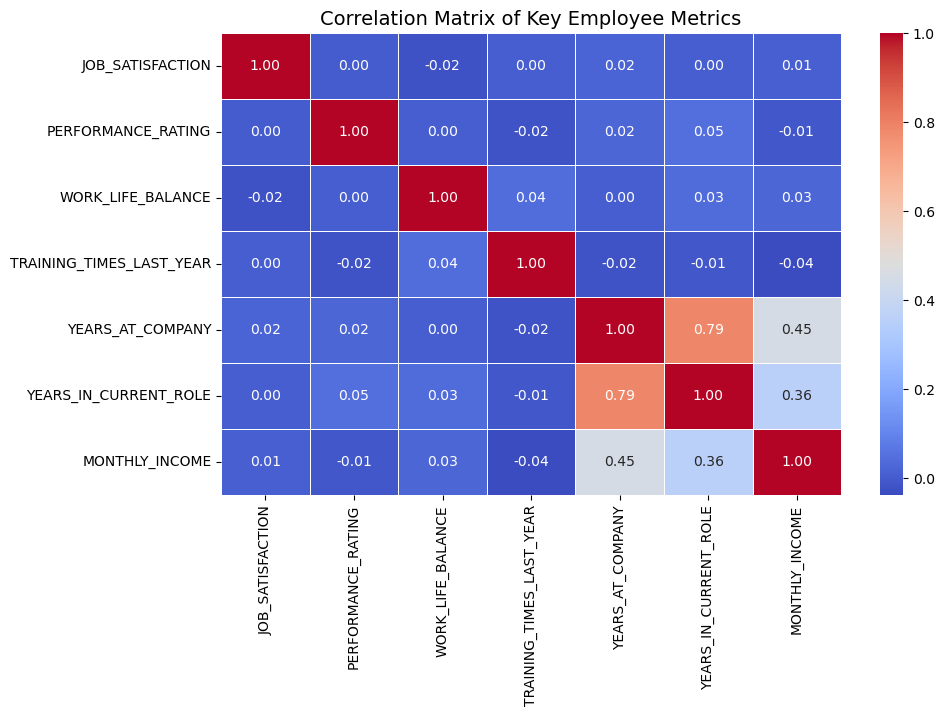

In [52]:
plt.figure(figsize=(10, 6))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Key Employee Metrics', fontsize=14)
plt.show()


###  There is a large overlap between tenure and the amount of time spent in the present role, as evidenced by the strong positive correlation (0.79) between Years at Company and Years in present Role.
### Years at Company (0.45) and Years in Current Role (0.36) have a moderately positive connection with Monthly Income, indicating that tenure affects pay growth.
### Other measures, such as work-life balance, job satisfaction, and performance rating, have little relationship with one another or other variables, suggesting that they could be impacted by subjective or outside influences.


# Data Visualization
## Use Matplotlib and Seaborn to create insighƞul visualizations such as:
##  Histograms to show the distribution of satisfaction levels

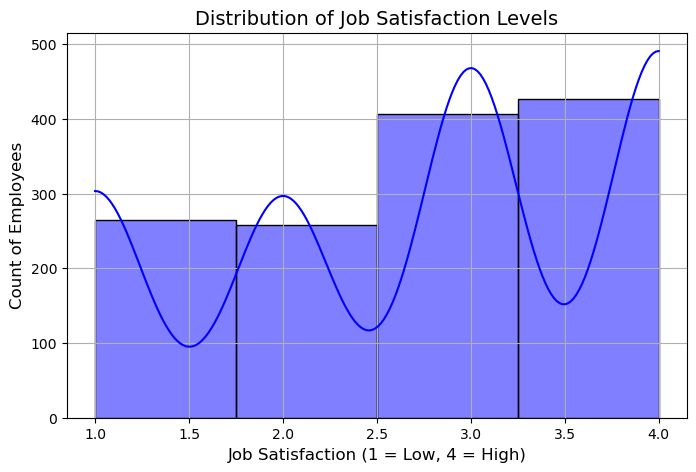

In [53]:
plt.figure(figsize=(8, 5))
sb.histplot(df['JOB_SATISFACTION'], bins=4, kde=True, color='blue')
plt.title('Distribution of Job Satisfaction Levels', fontsize=14)
plt.xlabel('Job Satisfaction (1 = Low, 4 = High)', fontsize=12)
plt.ylabel('Count of Employees', fontsize=12)
plt.grid()
plt.show()


### The majority of employees report a satisfaction level of 4, indicating that job satisfaction levels are biassed towards higher levels of satisfaction (levels 3 and 4).
### There may be room for development if a smaller percentage of workers indicate lower satisfaction ratings (1 and 2).



# Bar charts to compare department-wise attrition rates. 

In [54]:
df.ATTRITION.unique()

array(['Yes', 'No'], dtype=object)

In [55]:
df['ATTRITION'] = df['ATTRITION'].map({'Yes': 1, 'No': 0})
df.head()

,ATTRITION,BUSINESS_TRAVEL,CF_AGE_BAND,CF_ATTRITION_LABEL,DEPARTMENT,EDUCATION_FIELD,EMP_NO,EMPLOYEE_NUMBER,GENDER,JOB_ROLE,...,RELATIONSHIP_SATISFACTION,STANDARD_HOURS,STOCK_OPTION_LEVEL,TOTAL_WORKING_YEARS,WORK_LIFE_BALANCE,YEARS_AT_COMPANY,YEARS_IN_CURRENT_ROLE,YEARS_SINCE_LAST_PROMOTION,YEARS_WITH_CURR_MANAGER,Tenure_Group
0,1,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,1,80,0,8,1,6,4,0,5,4-10 years
1,0,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,80,1,10,3,10,7,1,7,11-20 years
2,1,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,2,80,0,7,3,0,0,0,0,0-3 years
3,0,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,80,0,8,3,8,7,3,0,4-10 years
4,0,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,4,80,1,6,3,2,2,2,2,0-3 years


In [56]:
dept_attrition = df.groupby('DEPARTMENT')['ATTRITION'].mean().sort_values(ascending=False)

# Convert to percentage
dept_attrition *= 100
print(dept_attrition)


DEPARTMENT
HR       22.222222
Sales    21.377672
R&D      14.755959
Name: ATTRITION, dtype: float64


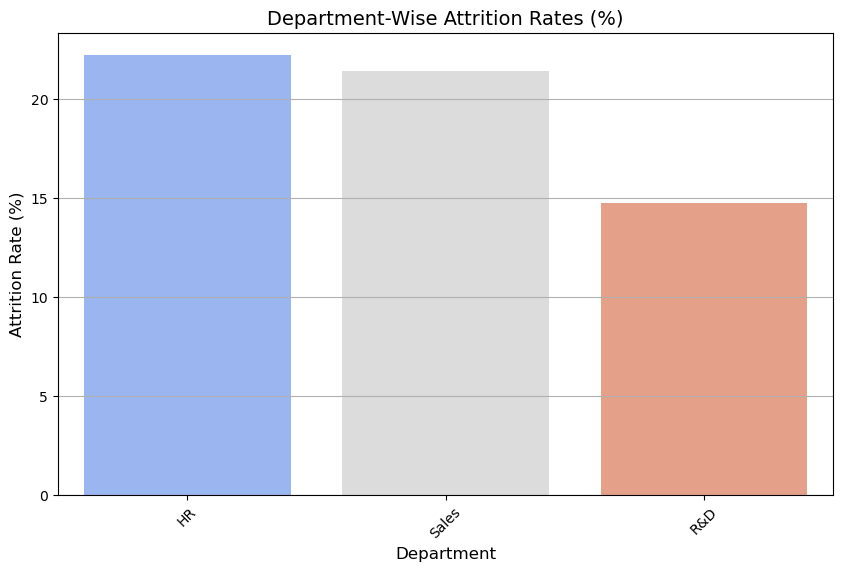

In [57]:
plt.figure(figsize=(10, 6))
sb.barplot(x=dept_attrition.index, y=dept_attrition.values, palette='coolwarm')
plt.title('Department-Wise Attrition Rates (%)', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### HR has the highest attrition rate, exceeding 20%, indicating potential dissatisfaction or instability within this department.
### Sales also shows a relatively high attrition rate, suggesting challenges in retaining employees.
### R&D has the lowest attrition rate, indicating higher stability or satisfaction compared to other departments.

# Box plots to analyze salary variations across job roles. 

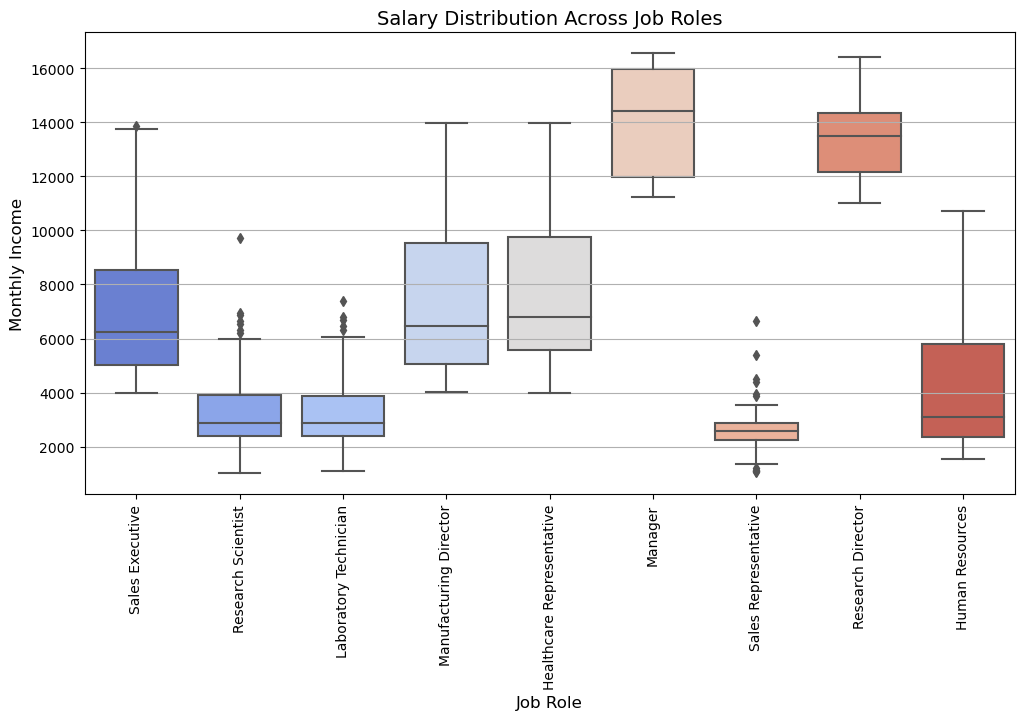

In [58]:
plt.figure(figsize=(12, 6))
sb.boxplot(x='JOB_ROLE', y='MONTHLY_INCOME', data=df, palette='coolwarm')
plt.title('Salary Distribution Across Job Roles', fontsize=14)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


### Research Directors and Managers have the highest median monthly income.
### Laboratory Technicians and Sales Representatives have the lowest median monthly income.
### There is significant variability in salaries within roles like Sales Executives and Managers,while roles like                  Laboratory Technicians have tighter salary distributions.

# Descriptive Analysis 
## Use Pandas and NumPy to compute descriptive statistics
# OR
## Summarize numerical variables. 


In [59]:
numeric_columns = ['AGE', 'DAILY_RATE', 'MONTHLY_INCOME', 'PERFORMANCE_RATING']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

categorical_columns = ['DEPARTMENT', 'JOB_ROLE', 'EDUCATION_FIELD', 'GENDER', 'MARITAL_STATUS', 'BUSINESS_TRAVEL',]
df[categorical_columns] = df[categorical_columns].astype('category')

print(df.dtypes)


ATTRITION                        int64
BUSINESS_TRAVEL               category
CF_AGE_BAND                     object
CF_ATTRITION_LABEL              object
DEPARTMENT                    category
EDUCATION_FIELD               category
EMP_NO                          object
EMPLOYEE_NUMBER                  int64
GENDER                        category
JOB_ROLE                      category
MARITAL_STATUS                category
OVER_TIME                       object
OVER18                          object
TRAINING_TIMES_LAST_YEAR         int64
NaN                              int64
0.1                              int64
AGE                              int64
CF_CURRENT_EMPLOYEE              int64
DAILY_RATE                       int64
DISTANCE_FROM_HOME               int64
EDUCATION                       object
EMPLOYEE_COUNT                   int64
ENVIRONMENT_SATISFACTION         int64
HOURLY_RATE                      int64
JOB_INVOLVEMENT                  int64
JOB_LEVEL                

In [60]:
numeric_summary = df.describe()
categorical_summary = df.describe(include=['category'])


In [61]:
numeric_summary

,ATTRITION,EMPLOYEE_NUMBER,TRAINING_TIMES_LAST_YEAR,NaN,0.1,AGE,CF_CURRENT_EMPLOYEE,DAILY_RATE,DISTANCE_FROM_HOME,EMPLOYEE_COUNT,...,PERFORMANCE_RATING,RELATIONSHIP_SATISFACTION,STANDARD_HOURS,STOCK_OPTION_LEVEL,TOTAL_WORKING_YEARS,WORK_LIFE_BALANCE,YEARS_AT_COMPANY,YEARS_IN_CURRENT_ROLE,YEARS_SINCE_LAST_PROMOTION,YEARS_WITH_CURR_MANAGER
count,1356.000000,1356.000000,1356.000000,1356.0,1356.0,1356.000000,1356.000000,1356.000000,1356.000000,1356.0,...,1356.000000,1356.000000,1356.0,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,0.171091,1028.637906,2.797935,-2.0,0.0,36.038348,0.828909,802.220501,9.351032,1.0,...,3.154867,2.702065,80.0,0.798673,10.036136,2.757375,6.367994,4.019912,1.959440,3.929204
std,0.376728,605.959746,1.298490,0.0,0.0,8.808835,0.376728,403.498941,8.131071,0.0,...,0.361912,1.081762,0.0,0.863374,6.583958,0.710063,5.183808,3.416960,2.932798,3.427176
min,0.000000,1.000000,0.000000,-2.0,0.0,18.000000,0.000000,102.000000,1.000000,1.0,...,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,490.250000,2.000000,-2.0,0.0,30.000000,1.000000,465.750000,2.000000,1.0,...,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,1017.500000,3.000000,-2.0,0.0,35.000000,1.000000,804.000000,7.000000,1.0,...,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,1568.250000,3.000000,-2.0,0.0,41.000000,1.000000,1157.000000,14.000000,1.0,...,3.000000,4.000000,80.0,1.000000,13.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,1.000000,2068.000000,6.000000,-2.0,0.0,60.000000,1.000000,1499.000000,29.000000,1.0,...,4.000000,4.000000,80.0,3.000000,40.000000,4.000000,40.000000,17.000000,15.000000,17.000000


In [62]:
categorical_summary

,BUSINESS_TRAVEL,DEPARTMENT,EDUCATION_FIELD,GENDER,JOB_ROLE,MARITAL_STATUS,Tenure_Group
count,1356,1356,1356,1356,1356,1356,1349
unique,3,3,6,2,9,3,4
top,Travel_Rarely,R&D,Life Sciences,Male,Sales Executive,Married,4-10 years
freq,955,881,560,811,326,611,729


# Summarize categorical variables. 


In [63]:
# Count unique values per categorical column
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}: {df[col].nunique()} unique values")


BUSINESS_TRAVEL: 3 unique values
CF_AGE_BAND: 5 unique values
CF_ATTRITION_LABEL: 2 unique values
DEPARTMENT: 3 unique values
EDUCATION_FIELD: 6 unique values
EMP_NO: 1356 unique values
GENDER: 2 unique values
JOB_ROLE: 9 unique values
MARITAL_STATUS: 3 unique values
OVER_TIME: 2 unique values
OVER18: 1 unique values
EDUCATION: 5 unique values
Tenure_Group: 4 unique values


# Examine unique values in categorical columns.

In [64]:
for col in df.select_dtypes(include=[ 'category']).columns:
    print(f"{col}: {df[col].nunique()} unique values")


BUSINESS_TRAVEL: 3 unique values
DEPARTMENT: 3 unique values
EDUCATION_FIELD: 6 unique values
GENDER: 2 unique values
JOB_ROLE: 9 unique values
MARITAL_STATUS: 3 unique values
Tenure_Group: 4 unique values


# Visualization of Employee Distribution 
## Create bar charts to visualize the distribution of employees across departments and job             roles. 

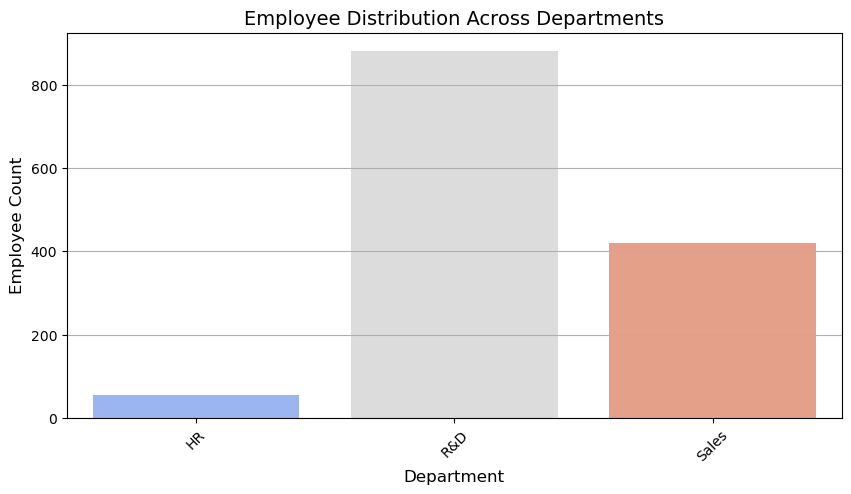

In [65]:
#Bar Chart / Count Plot 
plt.figure(figsize=(10, 5))
sb.countplot(x='DEPARTMENT', data=df, palette='coolwarm')
plt.title('Employee Distribution Across Departments', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### The majority of employees work in the R&D department, followed by Sales.
### HR has the smallest number of employees.

# Use histograms to understand the distribution of numeric variables such as salary.

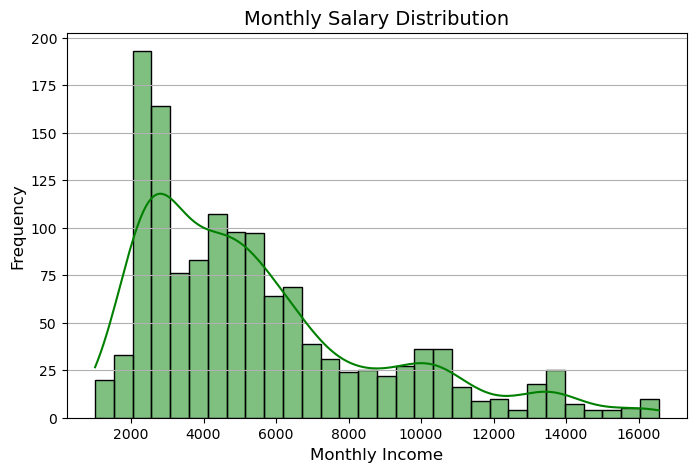

In [66]:
plt.figure(figsize=(8, 5))
sb.histplot(df['MONTHLY_INCOME'], bins=30, kde=True, color='green')
plt.title('Monthly Salary Distribution', fontsize=14)
plt.xlabel('Monthly Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()


### The salary distribution is right-skewed, with the majority of employees   earning between 2,000(dollar) and 6,000(dollar) per month. 
### Fewer employees earn higher salaries, with very few in the range of 10,000(dollar) to 16,000(dollar).

# Visualize correlations using Seaborn’s heatmap function

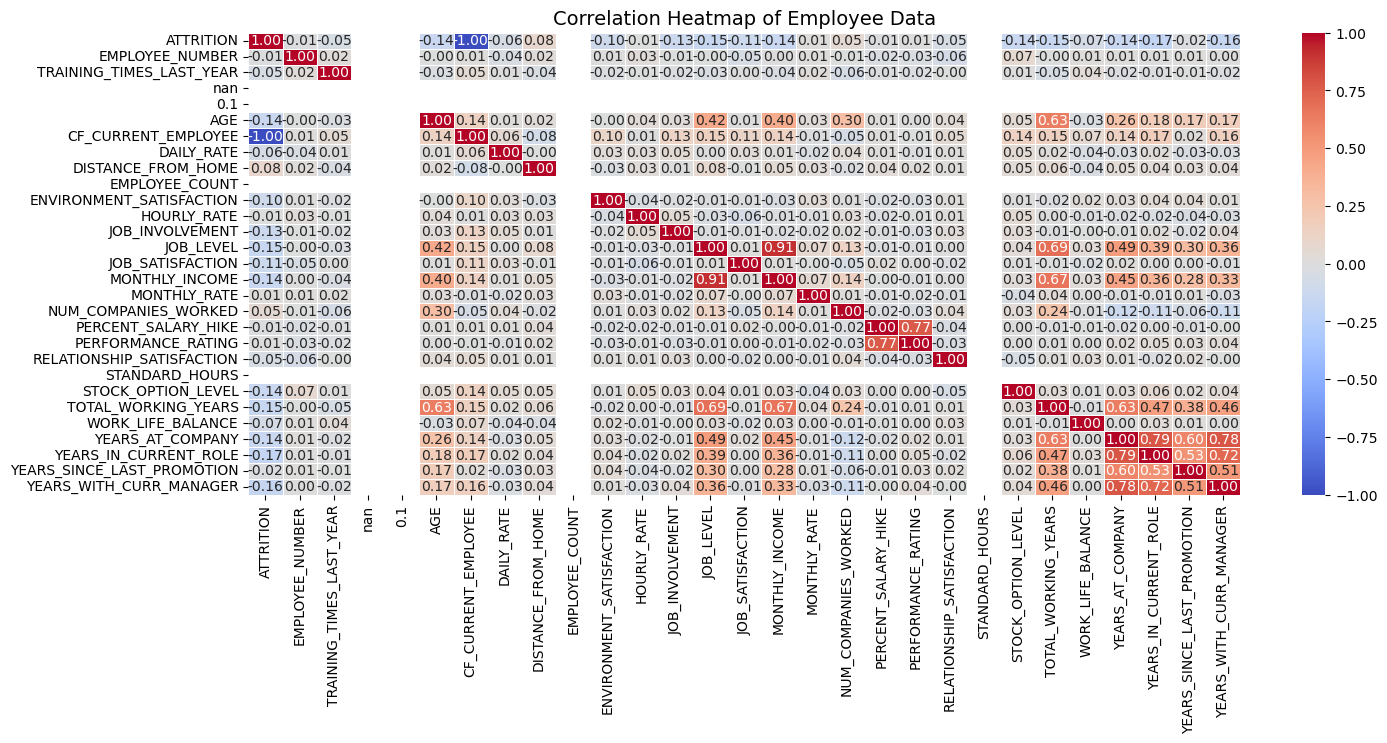

In [67]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(16, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Employee Data', fontsize=14)
plt.show()


## Job Satisfaction vs. Attrition: 
### The median job satisfaction of departing employees ("yes") was lower than that of remaining employees v                ("no").
### shows that one of the main causes of attrition is low work satisfaction.

## Monthly Income vs. Attrition:
### The median monthly income of departing employees was lower than that of retained employees. implies that income levels may have an impact on employee retention, with lower-paid workers having a higher turnover rate.

## Evaluation of Performance versus Attrition:
### There was no discernible difference in the performance evaluations of retained and attrited staff.
### Attrition may not be significantly influenced by performance ratings.

# Segment data based on attrition status
## OR
## Compare satisfaction levels, salaries, and performance ratings between retained and attrited employees using box plots

In [68]:
print(df['ATTRITION'].unique())


[1 0]


In [69]:

print(df['ATTRITION'].unique())
print(df.dtypes)


[1 0]
ATTRITION                        int64
BUSINESS_TRAVEL               category
CF_AGE_BAND                     object
CF_ATTRITION_LABEL              object
DEPARTMENT                    category
EDUCATION_FIELD               category
EMP_NO                          object
EMPLOYEE_NUMBER                  int64
GENDER                        category
JOB_ROLE                      category
MARITAL_STATUS                category
OVER_TIME                       object
OVER18                          object
TRAINING_TIMES_LAST_YEAR         int64
NaN                              int64
0.1                              int64
AGE                              int64
CF_CURRENT_EMPLOYEE              int64
DAILY_RATE                       int64
DISTANCE_FROM_HOME               int64
EDUCATION                       object
EMPLOYEE_COUNT                   int64
ENVIRONMENT_SATISFACTION         int64
HOURLY_RATE                      int64
JOB_INVOLVEMENT                  int64
JOB_LEVEL          

In [70]:
df['ATTRITION'] = df['ATTRITION'].astype(str).str.strip().str.lower()
print(df['ATTRITION'].unique())


['1' '0']


In [71]:
df['ATTRITION'] = df['ATTRITION'].replace({'1': 'yes', '0': 'no'})


In [72]:
print(df['ATTRITION'].unique())

['yes' 'no']


In [73]:
# Now, segment data
attrition_yes = df[df['ATTRITION'] == 'yes']  # Employees who left
attrition_no = df[df['ATTRITION'] == 'no']    # Employees who stayed

print(f"Employees who left: {len(attrition_yes)}")
print(f"Employees who stayed: {len(attrition_no)}")


Employees who left: 232
Employees who stayed: 1124


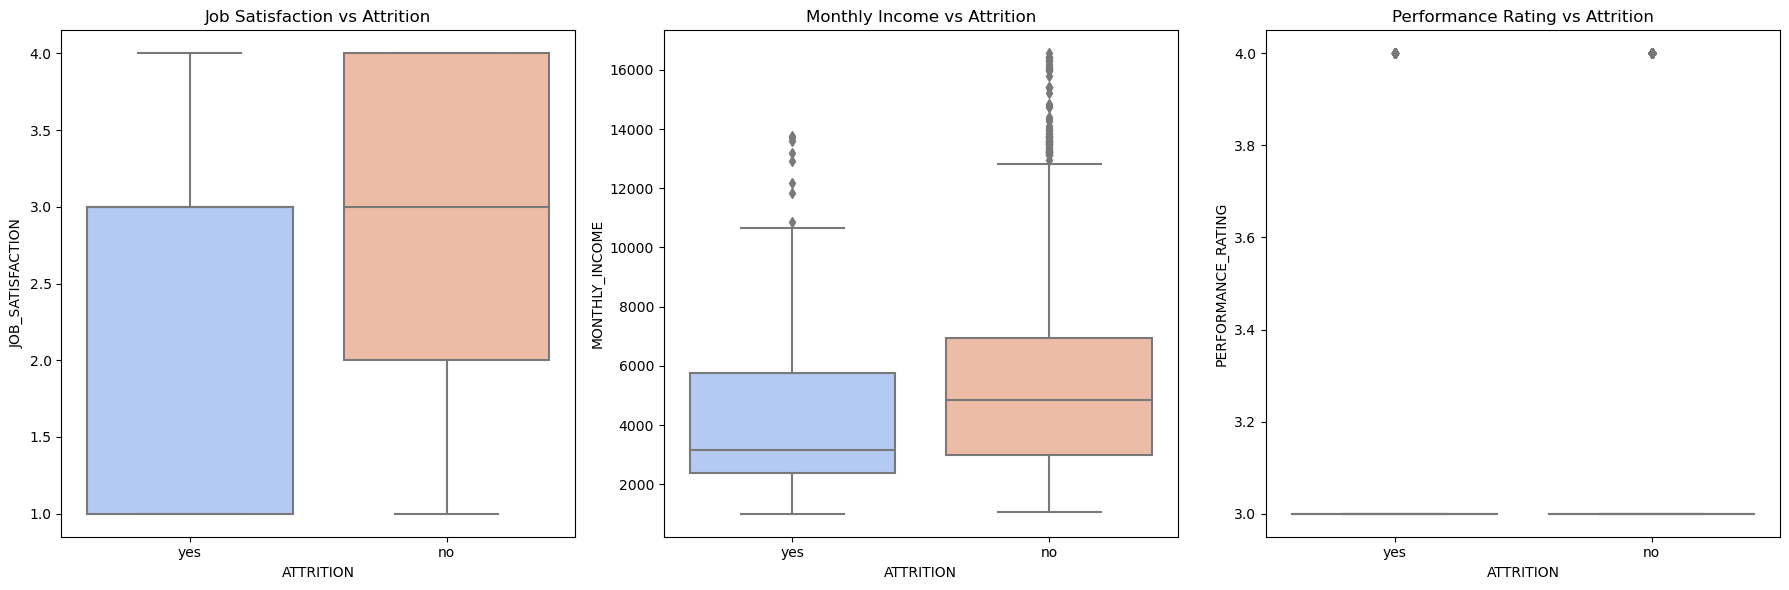

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot
sb.boxplot(x="ATTRITION", y="JOB_SATISFACTION", data=df, palette="coolwarm", ax=axes[0])
axes[0].set_title("Job Satisfaction vs Attrition")

# Boxplot for Monthly Income (Salary)
sb.boxplot(x="ATTRITION", y="MONTHLY_INCOME", data=df, palette="coolwarm", ax=axes[1])
axes[1].set_title("Monthly Income vs Attrition")

# Boxplot for Performance Rating
sb.boxplot(x="ATTRITION", y="PERFORMANCE_RATING", data=df, palette="coolwarm", ax=axes[2])
axes[2].set_title("Performance Rating vs Attrition")
plt.tight_layout()
plt.show()


## Job Satisfaction vs. Attrition: 
### The median job satisfaction of departing employees ("yes") was lower than that of remaining employees                    ("no").
### shows that one of the main causes of attrition is low work satisfaction.

## Monthly Income vs. Attrition:
### The median monthly income of departing employees was lower than that of retaine employees.
### implies that income levels may have an impact on employee retention, with lower-paid workers having a higher        turnover rate.

## Evaluation of Performance versus Attrition:
### There was no discernible difference in the performance evaluations of retained and attrited staff.
### Attrition may not be significantly influenced by performance ratings.

# Identify trends in attrition rates across different demographics.


In [75]:
# Group by demographic features and calculate attrition rate
def calculate_attrition_rate(df, column):
    attrition_rate = (
        df.groupby(column)['ATTRITION']
        .apply(lambda x: (x == 'yes').mean() * 100)
        .reset_index()
        .rename(columns={'ATTRITION': 'Attrition Rate (%)'})
    )
    return attrition_rate


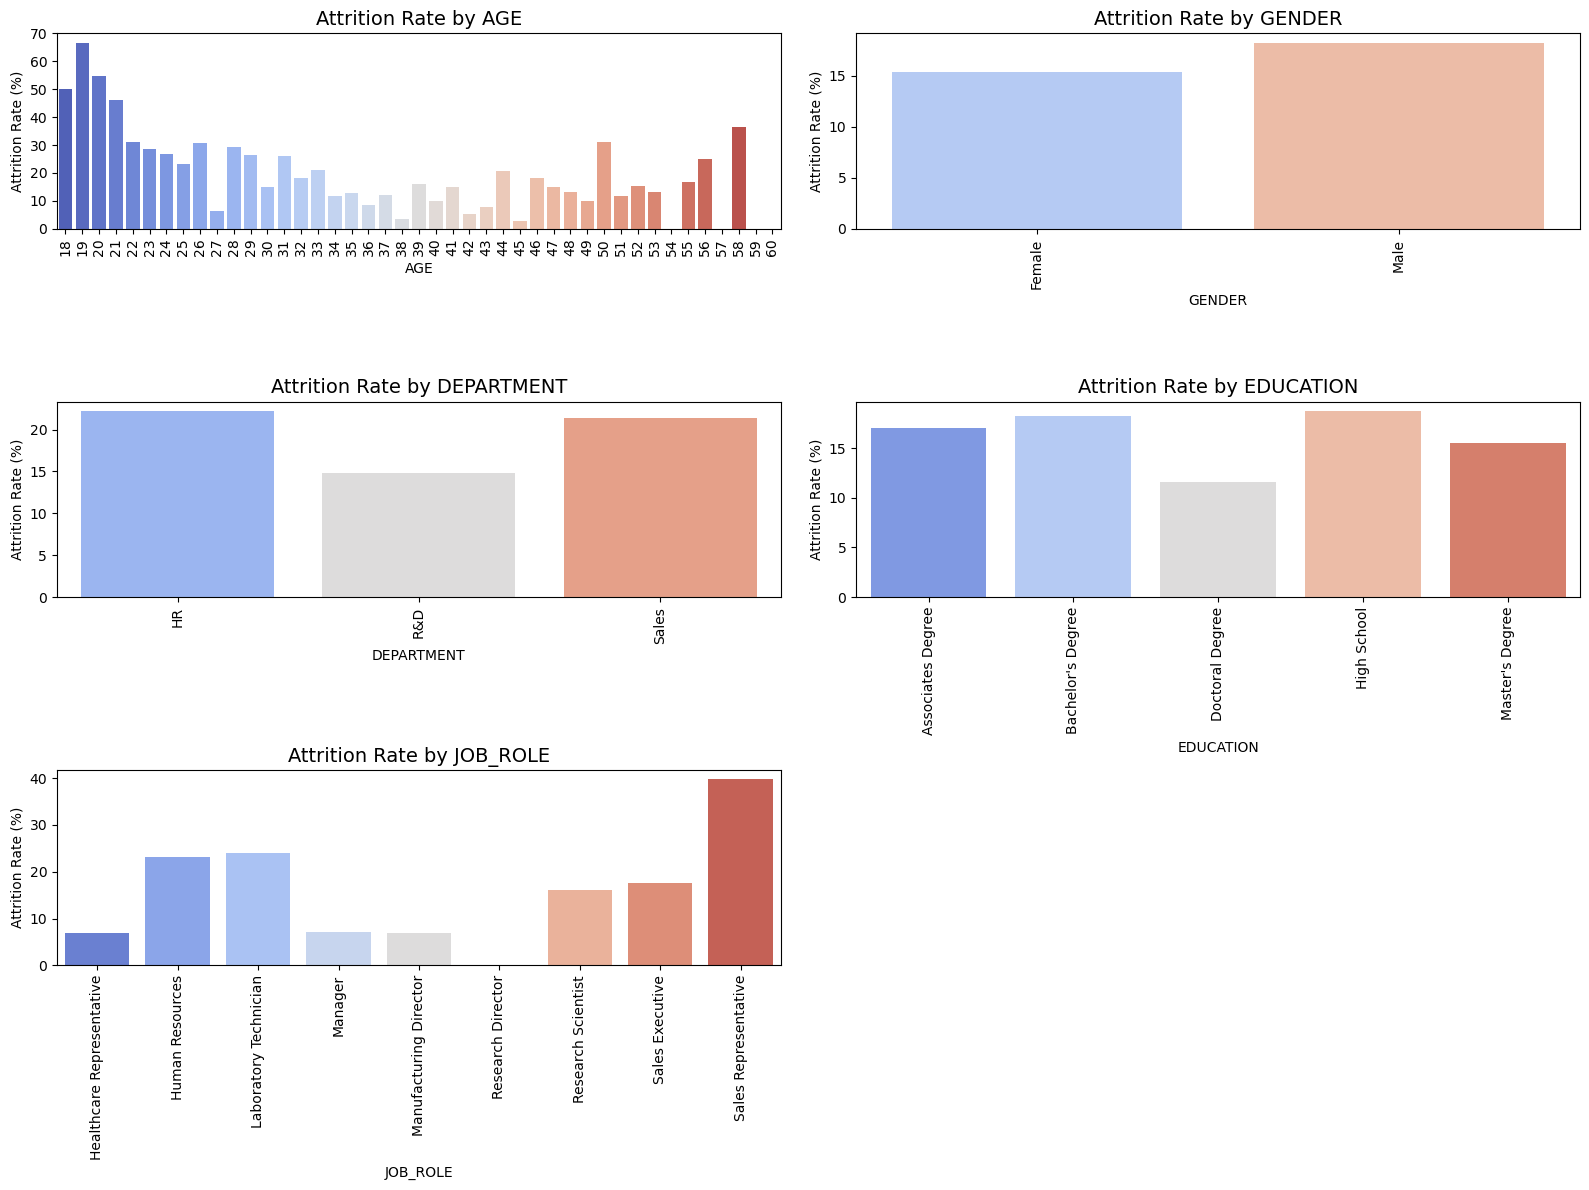

In [76]:
def calculate_attrition_rate(df, column):
    attrition_rate = (
        df.groupby(column)['ATTRITION']
        .apply(lambda x: (x == 'yes').mean() * 100)
        .reset_index()
        .rename(columns={'ATTRITION': 'Attrition Rate (%)'})
    )
    return attrition_rate

# Demographics to analyze
demographics = ['AGE', 'GENDER', 'DEPARTMENT', 'EDUCATION', 'JOB_ROLE']

plt.figure(figsize=(16, 12))

for i, col in enumerate(demographics, 1):
    plt.subplot(3, 2, i)
    attrition_rate = calculate_attrition_rate(df, col)
    sb.barplot(data=attrition_rate, x=col, y='Attrition Rate (%)', palette='coolwarm')
    plt.title(f'Attrition Rate by {col}', fontsize=14)
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()


## Age-Based Attrition:
### Significantly higher attrition rates among younger workers (those between the ages of 18 and 25) may indicate        discontent or job mobility.
### High attrition is also seen among workers who are getting close to retirement age (55+), most likely as a result        of retirement. 

## Attrition by Gender:
### There is no discernible difference in retention between males and females, as attrition rates are comparable for         both sexes.

## Department-specific attrition:
### The departments with the highest attrition rates are sales and human resources.
### The lowest attrition rate is found in research and development (R&D), which may indicate greater stability or work satisfaction.

## Education-Based Attrition:
### Employees with doctorates have lower departure rates than those with merely a high school education,                    indicating that education level affects retention.

## Employee Attrition by Role:
### The highest attrition rates are experienced by sales representatives, suggesting either excessive turnover or            possible job discontent.
### Perhaps as a result of their job satisfaction and career security, research directors and managers have the                lowest attrition rates.

